# 2. Data Acquisition

#### Importing Libraries

In [1]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.ticker import FuncFormatter
# set it to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

# Regular expressions for string manipulation
import re

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

### 2.1 Loading the Data and information about it

In [2]:
# Reading CSV file.
loan_df = pd.read_csv('loan.csv')

In [3]:
# Shape of dataframe
print('Shape of loan dataset: {}'.format(loan_df.shape))

Shape of loan dataset: (39717, 111)


In [4]:
# Checking datatypes of loan data
print('Information about Datframe')
print(loan_df.info())

Information about Datframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [5]:
# Checking firt 5 rows 
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                 0.00   
1                NaN            NaN               NaN                 0.00   
2                NaN            NaN               NaN                 0.00   
3                NaN            NaN               NaN                 0.00   
4                NaN            NaN               NaN                 0.00   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0      0.00             NaN               NaN            NaN   
1      0.00             NaN               NaN            NaN   
2      0.00             NaN               NaN            NaN   
3      0.00             NaN               NaN            NaN   
4      0.00             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

# 3. Data Preparation

## 3.1 Data Cleaning

In [6]:
# Checking for the number of rows having all missing values
print('Number of empty Rows: {}'.format(loan_df.isnull().all(axis=1).sum()))

# Checking for the number of columns having all missing values
print('Number of empty Columns: {}'.format(loan_df.isnull().all(axis=0).sum()))


Number of empty Rows: 0
Number of empty Columns: 54


In [7]:
# So there are 54 columns which have all the null values - dropping those columns
# Get the columns where all values are null
null_columns = loan_df.columns[loan_df.isnull().all(axis=0)]

# Drop these columns
loan_df.drop(null_columns, axis=1, inplace=True)

#### Understanding the Data Columns and Their Potential Use in EDA
To perform EDA effectively and understand which columns might help in predicting loan defaults, let's go through the data columns and discuss their potential relevance:

#### Applicant Information
1.	acc_now_delinq: Number of accounts currently delinquent. High delinquency might indicate a higher risk of default.
2.	acc_open_past_24mths: Number of trades opened in the past 24 months. More recent credit activity could indicate financial behavior trends.
3.	annual_inc / annual_inc_joint: Annual income of the borrower or combined income for joint applications. Higher income might reduce the likelihood of default.
4.	emp_length: Employment length in years. Longer employment can indicate financial stability.
5.	home_ownership: Home ownership status (e.g., RENT, OWN, MORTGAGE). Homeowners might be seen as less risky compared to renters.
6.	zip_code: Geographic location might reveal economic conditions but might be less directly relevant without more granular data.

#### Loan Information
1.	loan_amnt: The amount of the loan applied for. Larger loans might carry higher risks.
2.	funded_amnt / funded_amnt_inv: Total amount committed to the loan, useful for understanding loan size dynamics.
3.	int_rate: Interest rate on the loan. Higher rates might be associated with higher risk applicants.
4.	grade / sub_grade: Loan grade assigned by the company, already an indicator of perceived risk.
5.	installment: Monthly payment amount. Higher installments relative to income might indicate higher default risk.
6.	term: Duration of the loan (36 or 60 months). Longer terms might have different risk profiles.
7.	loan_status: Current status of the loan (fully paid, current, charged-off). This is the target variable for historical data.

#### Credit History
1.	fico_range_high / fico_range_low: FICO score range at loan origination. Lower FICO scores generally indicate higher risk.
2.	inq_last_6mths / inq_last_12m: Number of credit inquiries. More inquiries might indicate higher credit risk.
3.	open_acc: Number of open credit lines. This can show how actively the borrower is seeking credit.
4.	revol_util: Revolving line utilization rate. High utilization rates can indicate over-leverage.
5.	total_acc: Total number of credit lines. Higher numbers might indicate credit management experience.

#### Delinquency and Default Metrics
1.	delinq_2yrs: Number of delinquencies in the past 2 years. More delinquencies might indicate higher default risk.
2.	mths_since_last_delinq: Months since the last delinquency. More recent delinquencies might be more predictive of default.
3.	mths_since_last_record: Months since the last public record (e.g., bankruptcy). Recent records might indicate higher risk.
4.	mths_since_recent_inq: Months since the most recent inquiry. Recent inquiries might indicate recent credit-seeking behavior.
5.	num_accts_ever_120_pd: Number of accounts ever 120+ days past due. This indicates severe past delinquencies.

#### Other Potentially Useful Columns
1. purpose: The purpose of the loan (e.g., debt consolidation, credit card). Certain purposes might carry different risk levels.
2. dti / dti_joint: Debt-to-income ratio. Higher ratios might indicate higher risk.
3. verification_status: Whether the income was verified. Unverified income might be less reliable.
4. total_rec_late_fee: Late fees received to date. This might indicate past payment behavior.

In [8]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

### Less Useful Columns
1.	id / member_id: Unique identifiers for the loan and borrower. Useful for tracking but not for prediction.
2.	pymnt_plan: Indicates if a payment plan has been put in place. Might not provide direct insight into default risk.
3.	url: URL for the LC page with listing data. Not relevant for prediction.
4.	title: Loan title provided by the borrower. Text data that might require additional processing and may not be directly predictive.
5.	zip_code: First 3 numbers of the zip code. Geographic data might be less directly relevant without more context.
6.	addr_state: State provided by the borrower. Similar to zip code, might require more context.
7.	issue_d: The month the loan was funded. Useful for time-series analysis but might not directly predict default.
8.	initial_list_status: Initial listing status of the loan. Might not have a direct impact on default risk.
9.	last_pymnt_d: Last month payment was received. Useful for tracking payment history but less predictive by itself.
10.	last_pymnt_amnt: Last total payment amount received. Again, useful for history but less predictive.
11.	last_credit_pull_d: Most recent month LC pulled credit for this loan. Useful for timeline but less predictive.
12.	policy_code: Code for publicly available policies. Not directly useful for predicting defaults.


### Removing Unnecessary Columns

In [9]:
# Dropping all the less usefull columns 
less_useful_columns = ['id', 'member_id', 'pymnt_plan', 'url', 'title', 'zip_code', 'addr_state', 'initial_list_status', 
                       'last_pymnt_d', 'last_pymnt_amnt', 'policy_code', 'desc', 'emp_title', 'acc_now_delinq',
                       'pub_rec_bankruptcies', 'last_credit_pull_d'] 
loan_df.drop(less_useful_columns, inplace=True, axis=1)

#### Behavioral Data (Post-Loan Approval) - Not Useful for Initial Analysis
1.	out_prncp / out_prncp_inv: Remaining outstanding principal. This information is only available after the loan is disbursed.
2.	total_pymnt / total_pymnt_inv: Payments received to date. This reflects post-loan behavior.
3.	total_rec_prncp: Principal received to date. Post-loan disbursement data.
4.	total_rec_int: Interest received to date. Post-loan disbursement data.
5.	total_rec_late_fee: Late fees received to date. Indicates post-loan payment behavior.
6.	recoveries: Post charge-off gross recovery. Post-default data.
7.	collection_recovery_fee: Post charge-off collection fee. Post-default data.
8.	last_pymnt_d: Last month payment was received. Post-loan data.
9.	last_pymnt_amnt: Last total payment amount received. Post-loan data.
10.	last_credit_pull_d: Most recent month LC pulled credit for this loan. Post-loan monitoring data


In [10]:
# Dropping all Behovioral Data which is available Post-loan Approval - Not usefull for initial Analysis
post_loan_columns = ['out_prncp','out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp','total_rec_int', 
                     'total_rec_late_fee', 'recoveries','collection_recovery_fee', 'collections_12_mths_ex_med', 
                     'chargeoff_within_12_mths','delinq_amnt', 'tax_liens', 'application_type', 'revol_bal', 'next_pymnt_d', 
                     'mths_since_last_record', 'mths_since_last_delinq']
loan_df.drop(post_loan_columns, axis=1, inplace=True)

In [11]:
# Checking for the columns unique values
columns = loan_df.columns.to_list()
for i in columns:
    print('{}:\n {}\n'.format(i, loan_df[i].unique()))

loan_amnt:
 [ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  8250  9875 21500  7800  9750 15550 17000  7500  5800  8050
  5400  4125  9800 15700  9900  6250 10200 23000 25975 21250 33425  8125
 18800 19200 12875  2625 11300  4100 18225 18500 16800  2200 14050 16100
 10525 19775 14500 11700  4150 12375  1700 22250 11200 22500 15900  3150
 18550  8575  7700 24500 22200 21400  9

***The goal of this analysis is to determine which borrowers are likely to default, which can only be assessed for fully paid or charged-off loans.***
***As we cannot draw conclusions for loans currently in repayment, we will exclude records with a 'current' loan status from the analysis.***

In [12]:
# Excluding current loans
loan_df = loan_df[loan_df['loan_status'] != 'Current']

In [13]:
loan_df.shape

(38577, 23)

### Handling Missing Values

In [14]:
# Checking for the percent of null values present in each columns
(loan_df.isnull().mean().sort_values(ascending=False)) *100

emp_length            2.68
revol_util            0.13
loan_amnt             0.00
issue_d               0.00
pub_rec               0.00
open_acc              0.00
inq_last_6mths        0.00
earliest_cr_line      0.00
delinq_2yrs           0.00
dti                   0.00
purpose               0.00
loan_status           0.00
verification_status   0.00
funded_amnt           0.00
annual_inc            0.00
home_ownership        0.00
sub_grade             0.00
grade                 0.00
installment           0.00
int_rate              0.00
term                  0.00
funded_amnt_inv       0.00
total_acc             0.00
dtype: float64

In [15]:
# emp_length and revol_util columns has missing values - We can drop missing values row as only 2.68% and 0.13% values are missing.
# Checking values in emp_length columns
loan_df.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [16]:
# Removing null values in emp_length columns
loan_df = loan_df.dropna(subset=['emp_length'])

In [17]:
# Checking values in revol_util columns
loan_df.revol_util.value_counts()

revol_util
0%        918
63%        61
0.20%      61
40.70%     56
61%        55
         ... 
25.74%      1
0.83%       1
47.36%      1
24.65%      1
7.28%       1
Name: count, Length: 1086, dtype: int64

In [18]:
# Removing null values in revol_util columns
loan_df = loan_df.dropna(subset=['revol_util'])

In [19]:
(loan_df.isnull().mean().sort_values(ascending=False)) *100

loan_amnt             0.00
issue_d               0.00
revol_util            0.00
pub_rec               0.00
open_acc              0.00
inq_last_6mths        0.00
earliest_cr_line      0.00
delinq_2yrs           0.00
dti                   0.00
purpose               0.00
loan_status           0.00
verification_status   0.00
funded_amnt           0.00
annual_inc            0.00
home_ownership        0.00
emp_length            0.00
sub_grade             0.00
grade                 0.00
installment           0.00
int_rate              0.00
term                  0.00
funded_amnt_inv       0.00
total_acc             0.00
dtype: float64

We are done with handling missing values

In [20]:
# Shape odf the dataframe after removing missing values
loan_df.shape

(37497, 23)

### Removing duplicate rows

In [21]:
# Removing duplicate rows in the dataframe
loan_df= loan_df.drop_duplicates()
# Shape of the dataframe after removing duplicate rows
print(loan_df.shape)

(37497, 23)


There are no duplicate rows in the dataframe. Moving forward to correcting data types

## 3.2 Data Transformation

### Data Transformation

In [22]:
# Checking information about each columns
print(loan_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 37497 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37497 non-null  int64  
 1   funded_amnt          37497 non-null  int64  
 2   funded_amnt_inv      37497 non-null  float64
 3   term                 37497 non-null  object 
 4   int_rate             37497 non-null  object 
 5   installment          37497 non-null  float64
 6   grade                37497 non-null  object 
 7   sub_grade            37497 non-null  object 
 8   emp_length           37497 non-null  object 
 9   home_ownership       37497 non-null  object 
 10  annual_inc           37497 non-null  float64
 11  verification_status  37497 non-null  object 
 12  issue_d              37497 non-null  object 
 13  loan_status          37497 non-null  object 
 14  purpose              37497 non-null  object 
 15  dti                  37497 non-null  floa

In [23]:
# Checking unique values in each columns to get more information about data present in each columns
columns = loan_df.columns.to_list()
for i in columns:
    print('{}:\n {}\n'.format(i, loan_df[i].unique()))

loan_amnt:
 [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000  3500
 12500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750 13650
 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475 22000
  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625 15075
  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125 13200
  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000  4475  6300
  8250  9875 21500  7800  9750 15550  7500  5800  8050  5400  4125  9800
 15700  9900  6250 10200 23000 21250 33425  8125 18800 19200 12875  2625
 11300  4100 18225 18500 16800  2200 14050 10525 19775 14500 11700  4150
 12375 22250 11200 22500 15900  3150  7700 24500 22200 21400  9400 17000
 22400  5825  7650 20675 27050 20500 12

• **term**: The column term represents the loan term in months. Unique values are '36 months' and '60 months'. 
        Can be formatted properly to integer values by removing " months".
        
• **int_rate**: The column int_rate represents the interest rate on the loan. Unique values are percentages ranging from '5.42%' to '24.40%' with different  increments. 
            Can be formatted properly to float values by removing "%".

In [24]:
# Correcting data type and format of term, revol_util and int_rate columns
loan_df['term'] = loan_df['term'].apply(lambda x: x.replace(' months', '')).astype('int64')
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: x.replace('%', '')).astype('float')
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: x.replace('%', '')).astype('float')

In [25]:
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
loan_df['grade'] = pd.Categorical(loan_df['grade'], categories=grade_order, ordered=True)
emp_order = ['< 1 year', '2 years', '3 years', '4 years', '5 years', '6 years','7 years', '8 years', '9 years', '10+ years']
loan_df['emp_length'] = pd.Categorical(loan_df['emp_length'], categories=emp_order, ordered=True)

In [26]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc'],
      dtype='object')

### Handling Outliers

- ***Loan Amount***

count   37497.00
mean    11127.36
std      7353.97
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64


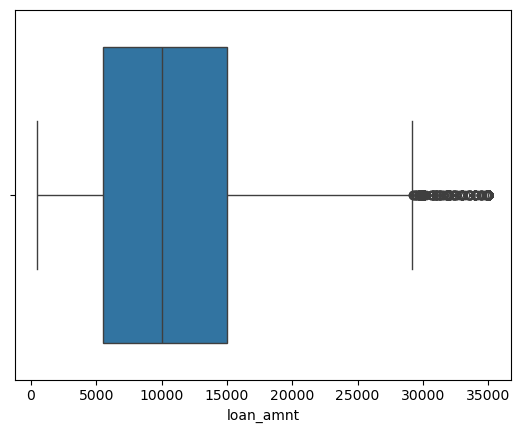

In [27]:
print(loan_df['loan_amnt'].describe())
sns.boxplot(x = loan_df['loan_amnt'])
plt.show()

***Not much difference in Mean and Median, So keeping all data***


- ***Funded Amount***

count   37497.00
mean    10861.26
std      7096.15
min       500.00
25%      5400.00
50%      9600.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64


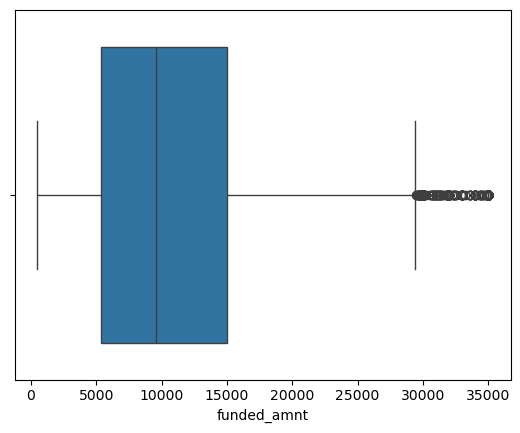

In [28]:
print(loan_df['funded_amnt'].describe())
sns.boxplot(x = loan_df['funded_amnt'])
plt.show()

In [29]:
loan_df.funded_amnt.describe()

count   37497.00
mean    10861.26
std      7096.15
min       500.00
25%      5400.00
50%      9600.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64

***Not much difference in Mean and Median, So keeping all the data***

- ***Annual Income***

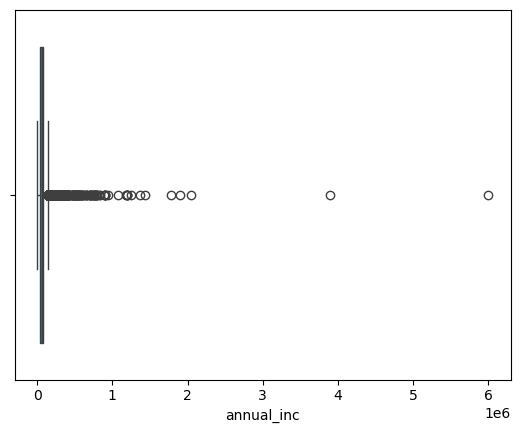

In [30]:
sns.boxplot(x = loan_df['annual_inc'])
plt.show()

In [31]:
loan_df.annual_inc.describe()

count     37497.00
mean      69436.53
std       64672.08
min        4000.00
25%       41000.00
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64

##### Calculating Upper fence i.e upper whisker value using formula given below:<br>
#### $upper_fence = Q3 + 1.5(IQR)$

In [32]:
upper_fence = loan_df.annual_inc.quantile(0.75) + 1.5 * (loan_df.annual_inc.quantile(0.75) - loan_df.annual_inc.quantile(0.25))
upper_fence

146000.0

In [33]:
# Removing all the values Beyond upper fenece
loan_df = loan_df[loan_df['annual_inc'] <= upper_fence]

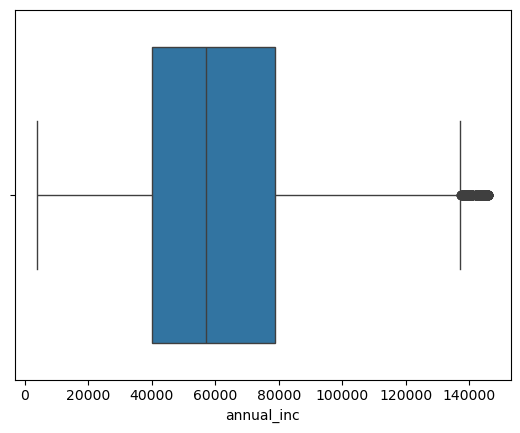

In [34]:
sns.boxplot(x = loan_df['annual_inc'])
plt.show()

***All Outliers are handled for annual income***

- ***Open Account***

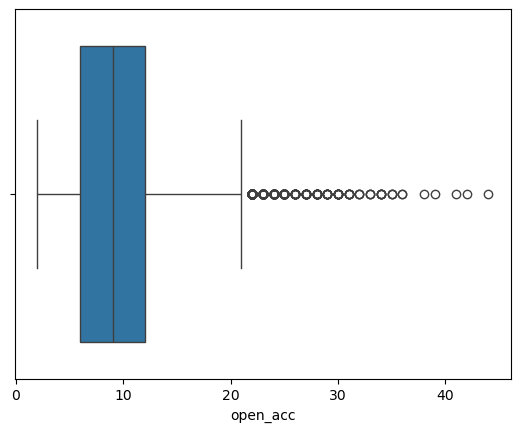

In [35]:
sns.boxplot(x = loan_df['open_acc'])
plt.show()

In [36]:
loan_df[loan_df['open_acc'] > 22]

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
250         4000         4000          4000.00    36     19.03       146.69   
601        12375        12375         12375.00    60     23.13       349.79   
916         7200         7200          7200.00    36     20.89       270.86   
1081       12000        12000         12000.00    60     20.89       323.90   
1506       31300        31300         31250.00    60     20.30       834.50   
...          ...          ...              ...   ...       ...          ...   
39454      18000        18000           814.61    36      9.33       575.17   
39538       6500         6500          1287.58    36      7.75       202.94   
39579      15450        15450          3500.00    36     10.91       505.16   
39588       3000         3000          2002.44    36     10.28        97.20   
39633      10250        10250           925.00    36     14.38       352.22   

      grade sub_grade emp_length home_ownership  ...  loan_status  \
250       E        E2  10+ years       MORTGAGE  ...   Fully Paid   
601       G        G2    5 years           RENT  ...  Charged Off   
916       F        F1   < 1 year       MORTGAGE  ...  Charged Off   
1081      F        F1    3 years       MORTGAGE  ...   Fully Paid   
1506      E        E5  10+ years       MORTGAGE  ...   Fully Paid   
...     ...       ...        ...            ...  ...          ...   
39454     B        B3  10+ years            OWN  ...   Fully Paid   
39538     A        A3  10+ years            OWN  ...   Fully Paid   
39579     C        C3    7 years           RENT  ...  Charged Off   
39588     C        C1   < 1 year           RENT  ...   Fully Paid   
39633     E        E4    4 years           RENT  ...   Fully Paid   

                  purpose   dti delinq_2yrs earliest_cr_line  inq_last_6mths  \
250              vacation 20.59           1           Jul-97               2   
601                 other 20.88           0           Jan-96               0   
916    debt_consolidation 20.46           0           Dec-94               3   
1081   debt_consolidation 13.76           0           Oct-00               0   
1506   debt_consolidation 21.84           0           Mar-81               1   
...                   ...   ...         ...              ...             ...   
39454  debt_consolidation 16.95           0           Jan-98               2   
39538  debt_consolidation 13.53           0           Oct-79               3   
39579  debt_consolidation 16.97           0           May-81               3   
39588               other 19.93           0           Sep-00               0   
39633  debt_consolidation 17.83           0           Mar-04               1   

       open_acc pub_rec  revol_util  total_acc  
250          30       0       22.60         56  
601          27       0       22.50         31  
916          34       0       57.50         61  
1081         25       1       68.30         52  
1506         30       0       43.90         63  
...         ...     ...         ...        ...  
39454        30       0        8.20         63  
39538        24       0        8.90         43  
39579        27       0       44.50         39  
39588        23       0       96.50         29  
39633        28       0        6.50         32  

[304 rows x 23 columns]

***Earliest credit line of all these customers are almost 10 Years+, so they must could have 20+ Open Account***

- ***Interest Rate***

<Axes: xlabel='int_rate'>

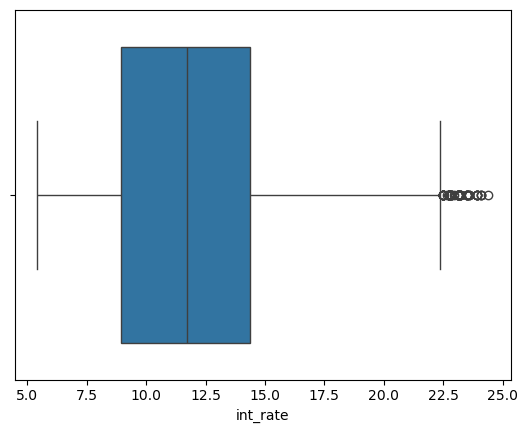

In [37]:
sns.boxplot(x = loan_df['int_rate'])

In [38]:
loan_df[loan_df['int_rate'] > 22.5]

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
223        24250        18100         18075.00    60     23.91       519.76   
601        12375        12375         12375.00    60     23.13       349.79   
616        22400        22400         22400.00    60     22.74       628.13   
733        24925        24925         24900.00    60     23.91       715.75   
1156       29100        29100         29100.00    60     23.91       835.63   
1619       24250        24250         24225.00    60     24.11       699.18   
1799       25000        25000         25000.00    60     24.11       720.80   
1839       35000        35000         34975.00    60     22.74       981.45   
2075       21575        21575         21550.00    60     23.91       619.55   
2447       26300        26300         26300.00    60     23.13       743.38   
2603       35000        35000         34963.58    60     23.91      1005.06   
2749       30000        30000         29750.00    60     23.52       854.71   
2801       14825        14825         14825.00    60     23.52       422.37   
3006       35000        35000         34788.45    60     23.52       997.16   
3017        5700         5700          5700.00    60     23.52       162.40   
3094       30000        30000         29575.00    60     23.13       847.96   
3308       35000        35000         33970.78    60     22.74       981.45   
3374       32000        32000         31813.20    60     22.74       897.33   
4214       23200        23200         23175.00    60     23.52       660.97   
4314       18400        18400         18350.00    60     23.13       520.08   
4408       12850        12850         12850.00    60     22.74       360.34   
4873       12800        12800         12800.00    60     23.52       364.68   
4913       35000        35000         35000.00    60     22.74       981.45   
5180       35000        35000         35000.00    60     22.74       981.45   
5267       20000        20000         19975.00    60     23.91       574.32   
5472        4400         4400          4400.00    60     22.74       123.39   
5479       30000        30000         29975.00    60     22.74       841.24   
5570       27300        27300         27275.00    60     23.13       771.65   
5603       21000        21000         20975.00    60     22.74       588.87   
5742       35000        35000         34925.00    60     22.74       981.45   
5782       30000        30000         30000.00    60     22.74       841.24   
5964       21250        21250         21225.00    60     24.11       612.68   
5966       35000        35000         34975.00    60     23.13       989.29   
6243       35000        35000         34975.00    60     22.74       981.45   
7466       30000        30000         28830.76    60     23.13       847.96   
7479       12900        12900         12850.00    60     22.74       361.74   
7903       35000        35000         34864.46    60     22.85       983.66   
7904       19200        19200         19115.29    60     22.85       539.61   
7910       35000        35000         33500.00    60     23.22       991.10   
8184       32400        26500         26475.00    60     22.85       744.77   
8305       22250        22250         22250.00    36     23.22       863.85   
9816       20500        20500         19891.69    60     22.85       576.14   
9854       13650        13650         13650.00    60     23.59       389.45   
10317       4800         4800          4800.00    60     22.85       134.91   
10380      13400        13400         13400.00    60     23.22       379.45   
10553      19750        19750         19750.00    60     23.22       559.27   
10661      10000        10000          4200.00    60     23.22       283.18   
12278       9550         9550          9550.00    60     23.22       270.43   
13136      19750        19750         19750.00    60     23.22       559.27   
13138      24000        24000         24000.00    60     

***Most of the record having grade G which means higher risk thats why higher interest rate so keeping all these records***

- ***Revolving Utilization***

<Axes: xlabel='revol_util'>

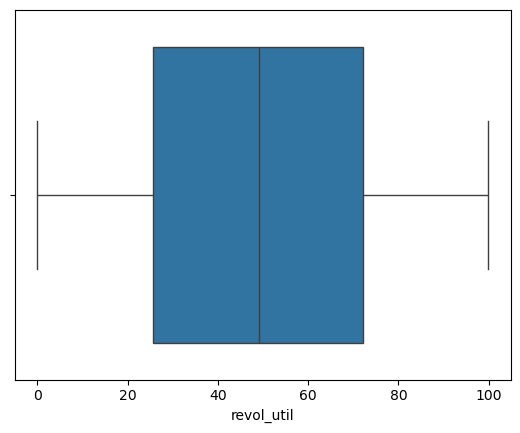

In [39]:
sns.boxplot(x = loan_df['revol_util'])

***Now outliers are handled so moving forward with EDA***

### Creating New Columns

#### Converting Issue date to date-time and creating two new columns year and month.

In [40]:
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

In [41]:
# Creating year and month columns
loan_df['year']=loan_df['issue_d'].dt.year
loan_df['month']=loan_df['issue_d'].dt.month

#### Creating Binned Variables for some numerical data

In [42]:
loan_df['interest_rate_bins'] = pd.cut(loan_df['int_rate'], bins=5, precision=0,labels=['5%-9%', '9%-13%', '13%-17%', '17%-21%', '21%-25%'])

loan_df['revolving_utilization_bins'] = pd.cut(loan_df['revol_util'], bins=5,precision=0,labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

loan_df['dti_bins'] = pd.cut(loan_df['dti'], bins=5,precision=0,labels=['0-6', '6-12', '12-18', '18-24', '24-30'])

loan_df['funded_amnt_bins'] = pd.cut(loan_df['funded_amnt'], bins=4,precision=0,labels=['0-10k', '10k-20k', '20k-30k', '30k-40k'])

loan_df['loan_amnt_bins'] = pd.cut(loan_df['loan_amnt'], bins=4,precision=0,labels=['0-10k', '10k-20k', '20k-30k', '30k-40k'])

loan_df['open_accounts_bins'] = pd.cut(loan_df['open_acc'], bins=5,precision=0,labels=['2-10', '10-19', '19-27', '27-36', '36-44'])

loan_df['total_accounts_bins'] = pd.cut(loan_df['total_acc'], bins=5,precision=0,labels=['2-20', '20-37', '37-55', '55-74', '74-90'])

loan_df['annual_income_bins'] = pd.cut(loan_df['annual_inc'], bins=5,precision=0,labels=['3k-31k', '31k-58k', '58k-85k', '85k-112k', '112k-140k'])

# 4. Exploratory Data Analysis(EDA)

## 4.1 Univariate Analysis

##### Categoriacal Data:
       'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line'

### Categorical Variables

- ***Loan Status***

loan_status
Fully Paid     30576
Charged Off     5192
Name: count, dtype: int64


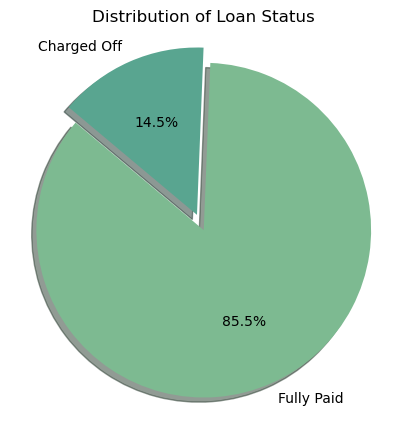

In [43]:
print(loan_df['loan_status'].value_counts())


plt.figure(figsize=(5, 5))
labels = ['Fully Paid', 'Charged Off']
explode = (0, 0.1)  
colors = sns.color_palette('crest')
plt.pie(loan_df['loan_status'].value_counts(), explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.axis('equal')


plt.title('Distribution of Loan Status')

# Show the chart
plt.show()

#### Inference:
***Defaulted loans are low in numbers compared to fully paid ones. There are 85.5% who have fully paid their loans, while 14.5% are defaulters.***

- ***Grade***

In [44]:
def count_plot(data, column, title, color_palette='viridis', rotate=False, hue=None, count=True):
    """
    Plots count distribution of a specified column in the given DataFrame.

    Parameters:
    - data: pd.DataFrame, the DataFrame containing the data
    - column: str, the name of the column to visualize
    - title: str, the title for the plot
    - color_palette: str, the name of the seaborn color palette to use for coloring plots (default: 'viridis')
    """
    if count==True:
        # Print value counts of the column
        print(data[column].value_counts())

    # Setting up the subplots
    fig, ax = plt.subplots(figsize=(8, 5))

    # Formatting Figure
    fig.suptitle(title, fontsize=16, fontweight='bold', color='darkblue')
    fig.patch.set_facecolor('#f5f5f5')  # Background color for the figure

    # Plot countplot
    sns.countplot(data=data, x=column, palette=color_palette, ax=ax, hue=hue, width=0.5, dodge=False)

    ax.set_xlabel(column, fontsize=12, color='darkred')
    ax.set_ylabel('Count', fontsize=12, color='darkred')

    # Customize ticks and labels
    ax.tick_params(axis='x', colors='purple')
    ax.tick_params(axis='y', colors='purple')
    
    #Rotate x-axis labels by 45 degrees
    if rotate == True:
        plt.xticks(rotation=45, ha='right')
    
        
    # Format y-axis labels
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x * 1e-3)}K'))

    fig.tight_layout()
    plt.show()

grade
B    10841
A     9309
C     7333
D     4740
E     2413
F      868
G      264
Name: count, dtype: int64


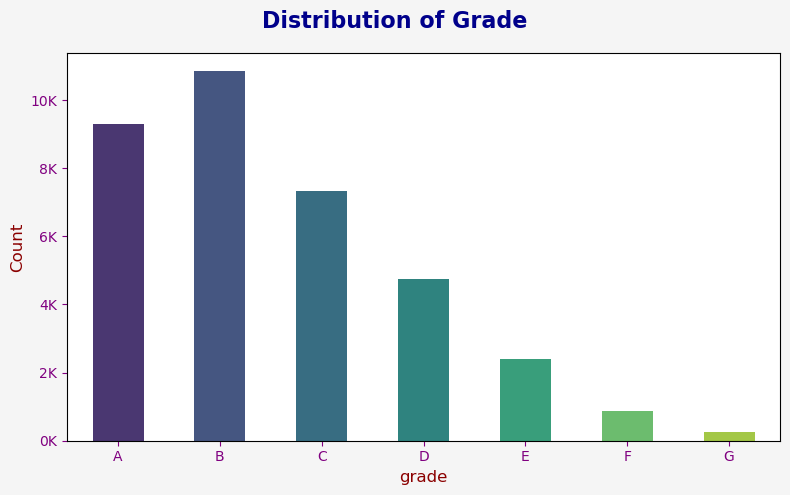

In [45]:
title = 'Distribution of Grade'
count_plot(loan_df, 'grade', title, color_palette='viridis')

- ***Sub-Grade***

In [46]:
loan_df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [47]:
# Lets convert sub-grade in 1,2,3,4
loan_df['sub_grade'] = loan_df['sub_grade'].apply(lambda x : x[-1])

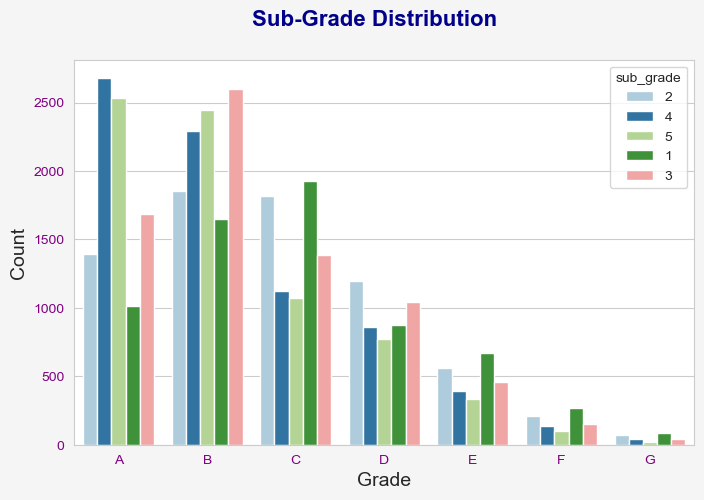

<Figure size 1000x600 with 0 Axes>

In [48]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 5))

# Formatting Figure
fig.suptitle('Sub-Grade Distribution', fontsize=16, fontweight='bold', color='darkblue')
fig.patch.set_facecolor('#f5f5f5')  # Background color for the figure

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', data=loan_df, hue = 'sub_grade', palette='Paired', ax=ax)

# Add title and labels
ax.set_xlabel('Grade', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Customize ticks and labels   
ax.tick_params(axis='x', colors='purple')
ax.tick_params(axis='y', colors='purple')

plt.show()


- ***Home Ownership***

home_ownership
RENT        17635
MORTGAGE    15385
OWN          2654
OTHER          91
NONE            3
Name: count, dtype: int64


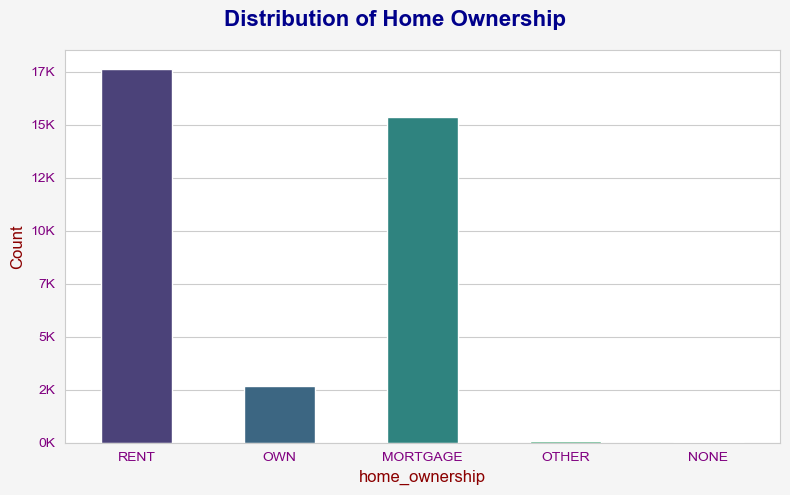

In [49]:
title = 'Distribution of Home Ownership'
count_plot(loan_df, 'home_ownership', title, color_palette='viridis')

#### Conclusion:
*Based on the analysis of home ownership among borrowers with 'Charged Off' loan status, it is evident that renters and mortgage holders are the most likely to default on their loans. Renters make up the largest group of defaulters, followed by those with mortgages. In contrast, individuals who own their homes outright have significantly lower default rates. These findings suggest that renters and mortgage holders may benefit from additional risk assessment and support during the loan approval process to mitigate the risk of default.*

- ***Employment Length***

emp_length
10+ years    7938
< 1 year     4340
2 years      4115
3 years      3838
4 years      3207
5 years      3055
6 years      2078
7 years      1644
8 years      1346
9 years      1157
Name: count, dtype: int64


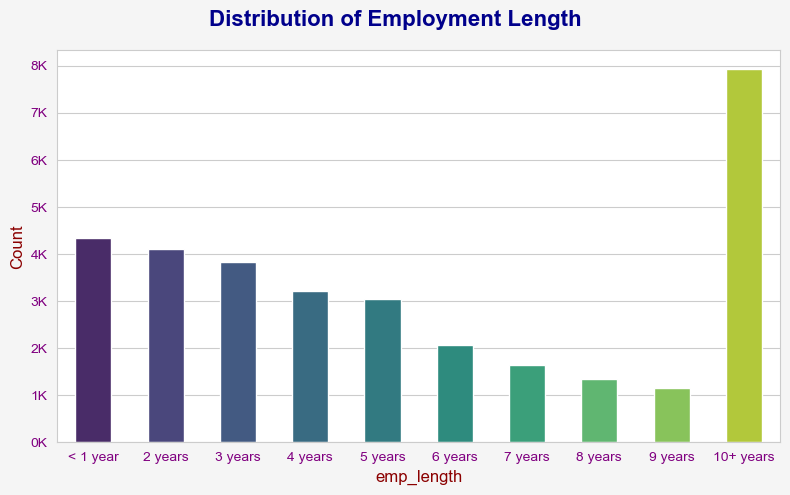

In [50]:
title = 'Distribution of Employment Length'
count_plot(loan_df, 'emp_length', title, color_palette='viridis')

#### Conclusion:
- Longest Tenure at Risk: Borrowers with over 10 years of employment have the highest rate of loan defaults.
- Short Tenure Vulnerability: Borrowers with less than 1 year of employment also show a high rate of defaults.
- Moderate Tenure Stability: Borrowers with 2-7 years of employment display relatively consistent but lower default rates compared to those with 10+ years or less than 1 year.

- ***Verification Status***

verification_status
Not Verified       15883
Verified           10874
Source Verified     9011
Name: count, dtype: int64


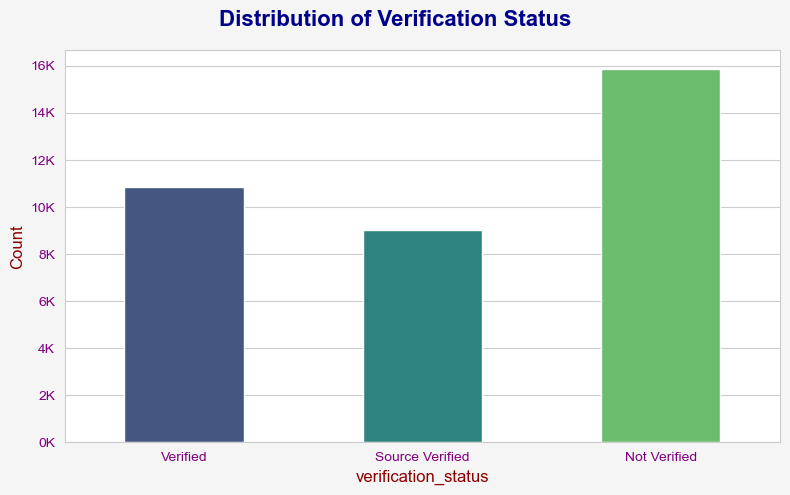

In [51]:
title = 'Distribution of Verification Status'
count_plot(loan_df, 'verification_status', title, color_palette='viridis')

#### Conclusion:
- Higher Default for Unverified: Borrowers with "Not Verified" status show the highest rate of loan defaults.
- Risk in Verification: Both "Verified" and "Source Verified" statuses still display substantial default rates, though slightly lower than "Not Verified."

- ***Purpose***

purpose
debt_consolidation    16996
credit_card            4679
other                  3548
home_improvement       2493
major_purchase         1979
small_business         1587
car                    1404
wedding                 884
medical                 619
moving                  526
vacation                338
house                   325
educational             303
renewable_energy         87
Name: count, dtype: int64


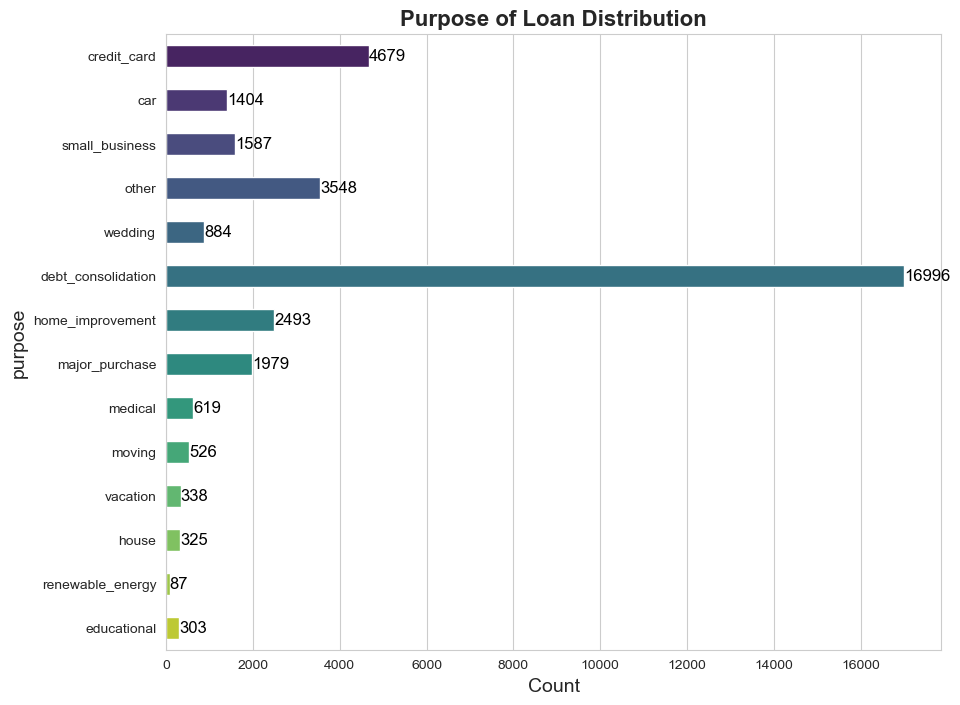

In [52]:
# purpose
print((loan_df['purpose'].value_counts()))

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the countplot
plt.figure(figsize=(10, 8))
ax = sns.countplot(y='purpose', data=loan_df, palette='viridis', width=0.5)
# Add title and labels
ax.set_title('Purpose of Loan Distribution', fontsize=16, weight='bold')
ax.set_ylabel('purpose', fontsize=14)
ax.set_xlabel('Count', fontsize=14)
# Add counts on the bars
for p in ax.patches:
    ax.text(
        p.get_width() + 0.1,  # Position slightly to the right of the bar
        p.get_y() + p.get_height() / 2,  # Center the text vertically
        int(p.get_width()),  # Display the count as an integer
        fontsize=12,
        color='black',
        ha='left',  # Align text to the left
        va='center'  # Vertically center the text
    )
plt.show()

- ***Terms***

term
36    27010
60     8758
Name: count, dtype: int64


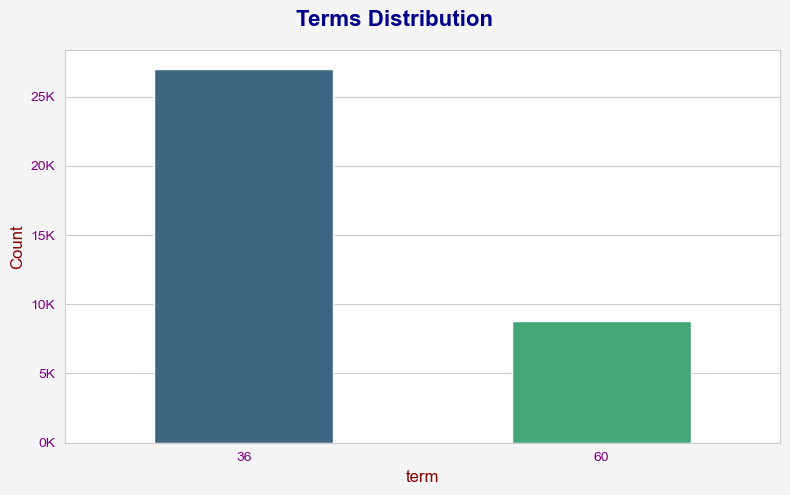

In [53]:
title = 'Terms Distribution'
count_plot(loan_df, 'term', title, color_palette='viridis')

### Numerical Variables

##### Numerical Data:
        'loan_amnt','funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
        'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
        'pub_rec', 'total_acc', 'revol_util'
       

In [54]:
def plot_box_hist_kde(data, column, title, color='skyblue'):
    """
    Creates subplots with boxplot and histogram + KDE for a specified column in the given DataFrame.

    Parameters:
    - data: pd.DataFrame, the DataFrame containing the data
    - column: str, the name of the column to visualize
    - title: str, the title for the plot
    - color: str, the color to use for plots (default: 'skyblue')
    """
    
    # Setting up the subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Formatting Figure
    fig.suptitle(title, fontsize=16, fontweight='bold', color='darkblue')
    fig.patch.set_facecolor('#f5f5f5')  # Background color for the figure

    # Boxplot on the first subplot
    sns.boxplot(x=data[column], ax=axes[0], color=color)
    axes[0].set_title(f'Boxplot of {column}', fontsize=14, fontweight='bold', color='darkblue')
    axes[0].set_xlabel(column, fontsize=12, color='darkred')
    axes[0].set_ylabel('')  # Remove y-label for boxplot

    # Histogram with KDE on the second subplot
    sns.histplot(data[column], kde=True, bins=30, ax=axes[1], color=color)  # Set histogram color
    axes[1].set_title(f'Histogram of {column} with KDE', fontsize=14, fontweight='bold', color='darkblue')
    axes[1].set_xlabel(column, fontsize=12, color='darkred')
    axes[1].set_ylabel('Frequency', fontsize=12, color='darkred')

    # Customize ticks and labels
    axes[0].tick_params(axis='x', colors='purple')
    axes[0].tick_params(axis='y', colors='purple')
    axes[1].tick_params(axis='x', colors='purple')
    axes[1].tick_params(axis='y', colors='purple')

    # Adjust layout
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [55]:
# Calculating statistical values for all numerical columns
loan_df.describe()

loan_amnt  funded_amnt  funded_amnt_inv     term  int_rate  \
count   35768.00     35768.00         35768.00 35768.00  35768.00   
mean    10783.48     10533.80          9978.50    41.88     11.92   
min       500.00       500.00             0.00    36.00      5.42   
25%      5100.00      5000.00          5000.00    36.00      8.94   
50%      9500.00      9175.00          8468.60    36.00     11.71   
75%     15000.00     14400.00         13750.00    36.00     14.35   
max     35000.00     35000.00         35000.00    60.00     24.40   
std      7075.60      6828.43          6762.21    10.32      3.66   

       installment  annual_inc                        issue_d      dti  \
count     35768.00    35768.00                          35768 35768.00   
mean        314.89    61812.27  2010-10-21 22:36:59.100872448    13.45   
min          15.69     4000.00            2007-06-01 00:00:00     0.00   
25%         164.85    40000.00            2010-05-01 00:00:00     8.37   
50%         273.61    57000.00            2011-01-01 00:00:00    13.59   
75%         412.18    78900.75            2011-07-01 00:00:00    18.70   
max        1305.19   146000.00            2011-12-01 00:00:00    29.99   
std         200.18    28186.14                            NaN     6.65   

       delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
count     35768.00        35768.00  35768.00 35768.00    35768.00   35768.00   
mean          0.15            0.87      9.20     0.05       48.83      21.71   
min           0.00            0.00      2.00     0.00        0.00       2.00   
25%           0.00            0.00      6.00     0.00       25.50      13.00   
50%           0.00            1.00      9.00     0.00       49.20      20.00   
75%           0.00            1.00     12.00     0.00       72.20      28.00   
max          11.00            8.00     44.00     4.00       99.90      90.00   
std           0.49            1.06      4.35     0.24       28.26      11.23   

          year    month  
count 35768.00 35768.00  
mean   2010.30     7.11  
min    2007.00     1.00  
25%    2010.00     4.00  
50%    2011.00     7.00  
75%    2011.00    10.00  
max    2011.00    12.00  
std       0.89     3.41

- ***Loan Amount***

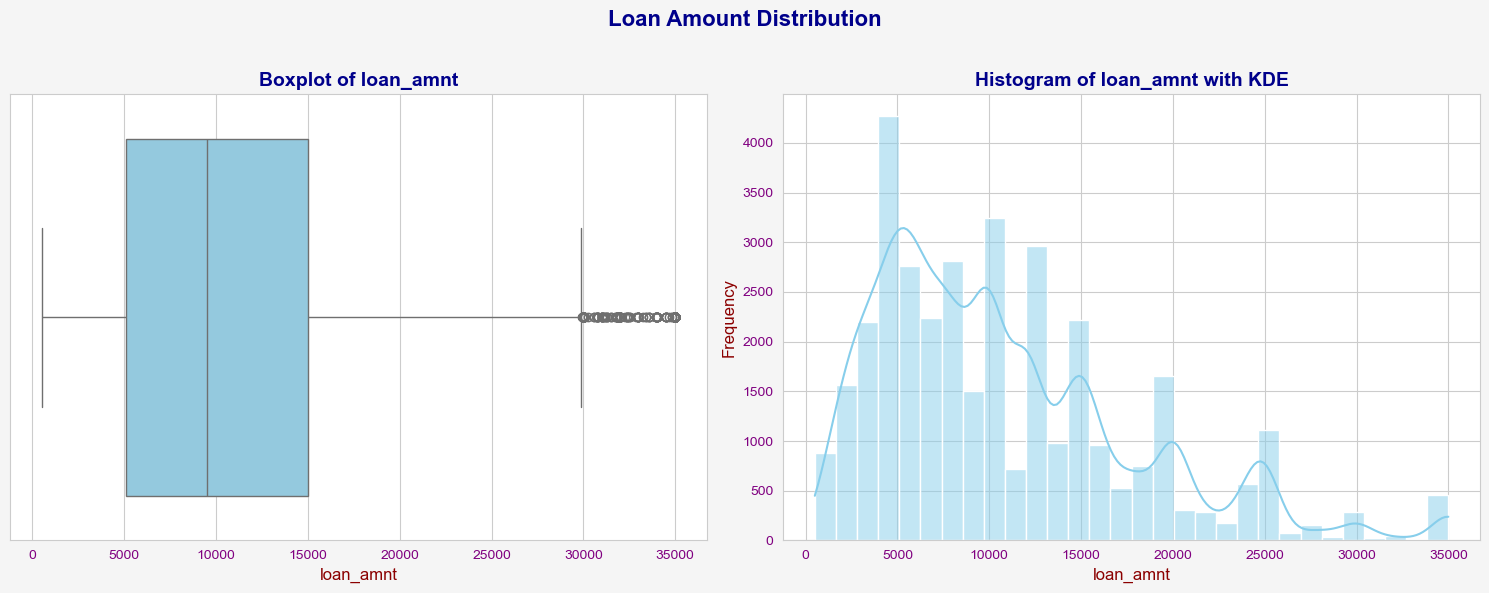

In [56]:
title = 'Loan Amount Distribution'
plot_box_hist_kde(loan_df, 'loan_amnt', title)

- ***Installment***

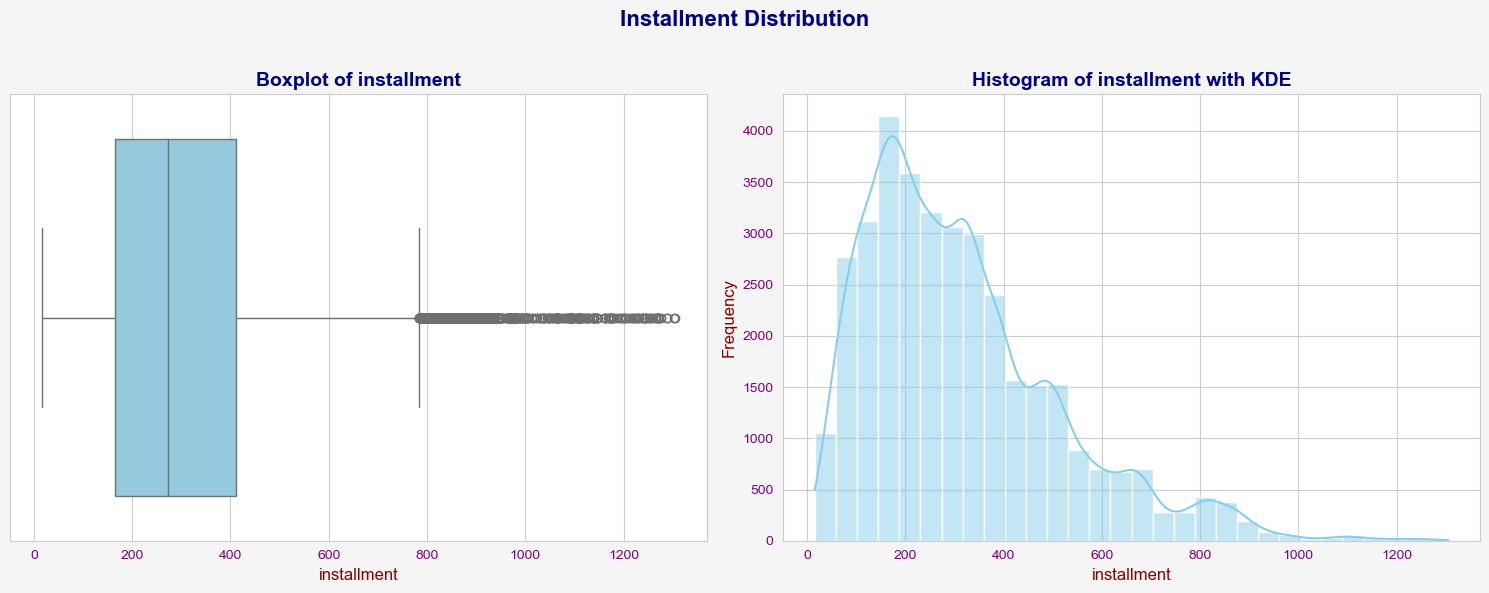

In [57]:
title = 'Installment Distribution'
plot_box_hist_kde(loan_df, 'installment', title)

- ***Inquries in Last 6 months***

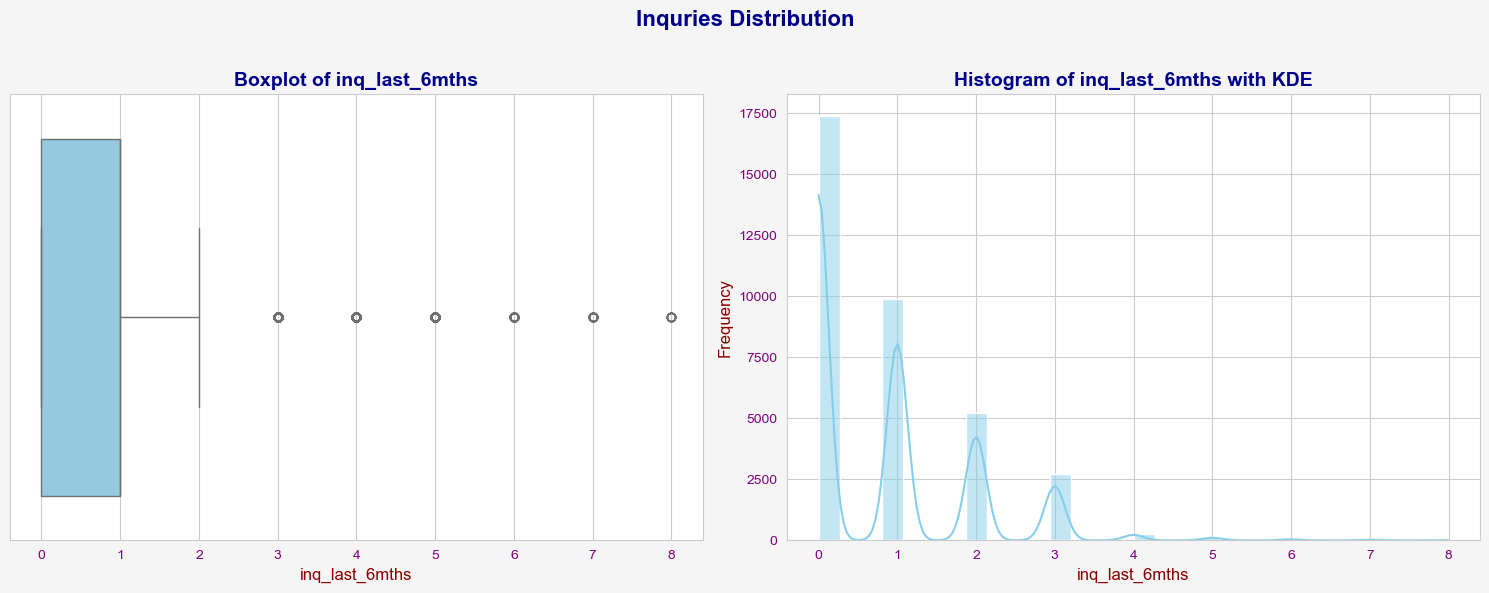

In [58]:
title = 'Inquries Distribution'
plot_box_hist_kde(loan_df, 'inq_last_6mths', title)

- ***Interest Rate***

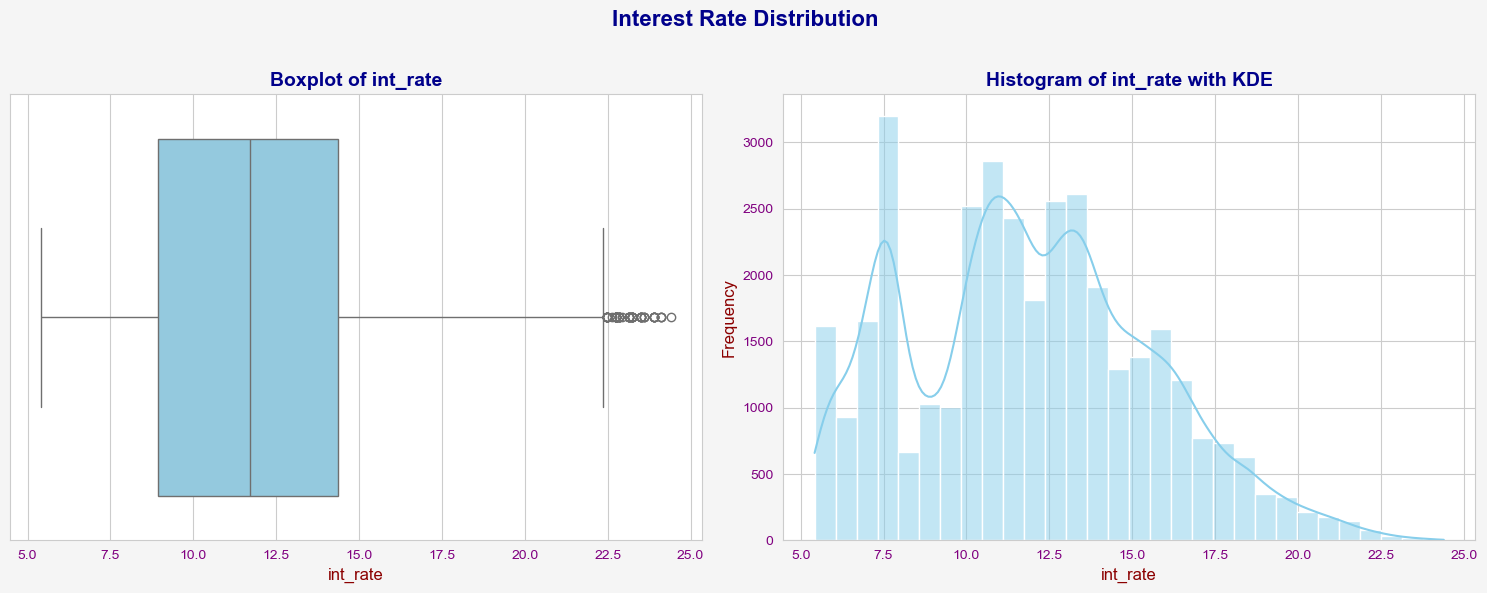

In [59]:
title = 'Interest Rate Distribution'
plot_box_hist_kde(loan_df, 'int_rate', title)

- ***Annual Income***

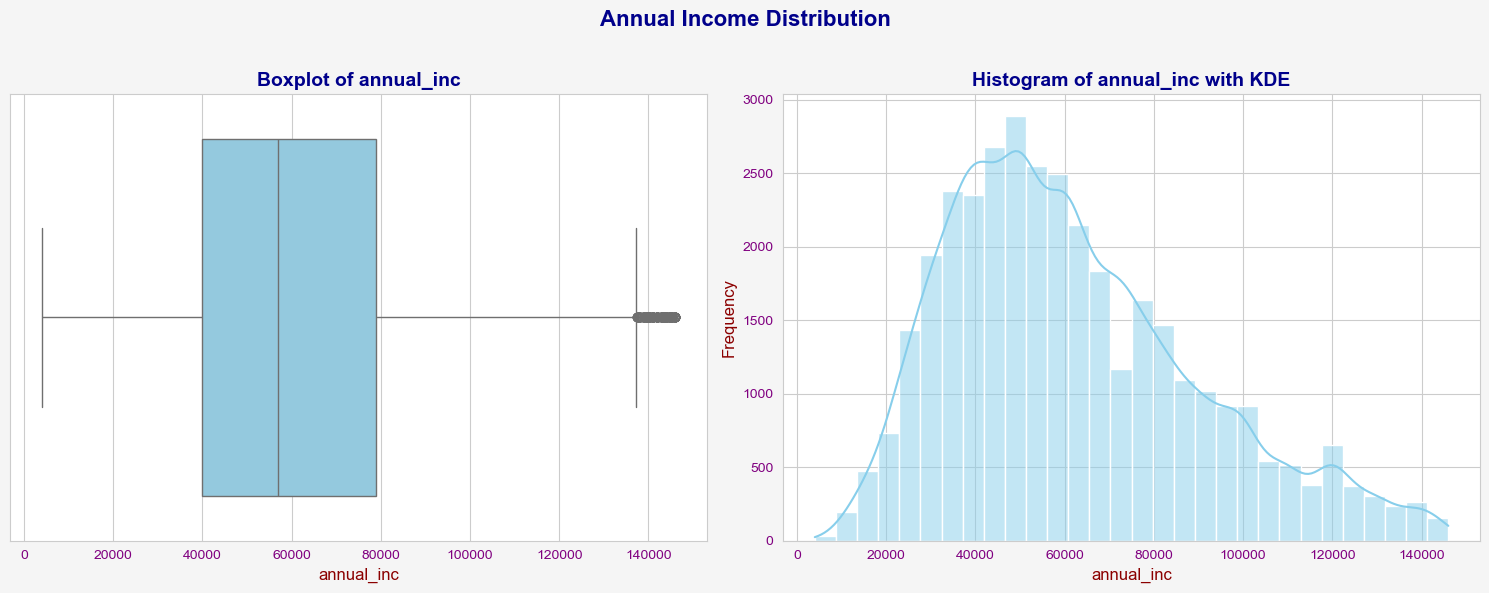

In [60]:
title = 'Annual Income Distribution'
plot_box_hist_kde(loan_df, 'annual_inc', title)

- ***Revolving Utilization***

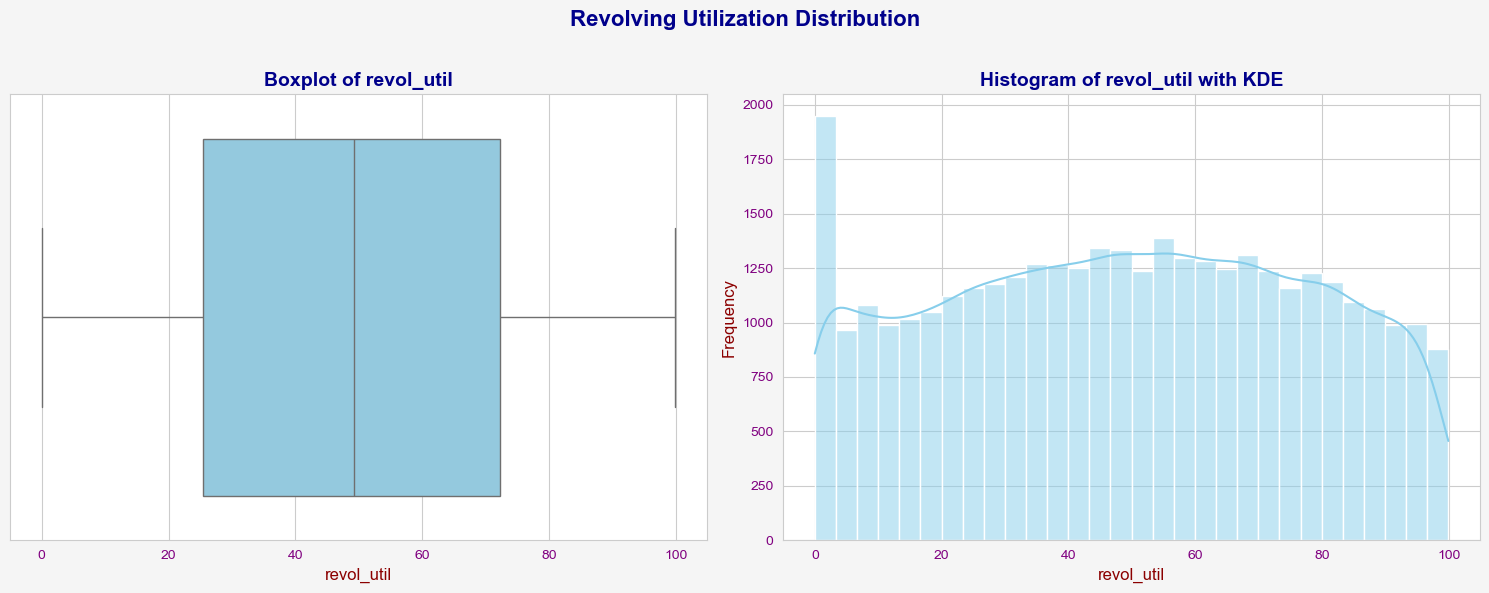

In [61]:
title = 'Revolving Utilization Distribution'
plot_box_hist_kde(loan_df, 'revol_util', title)

- ***Open Account***

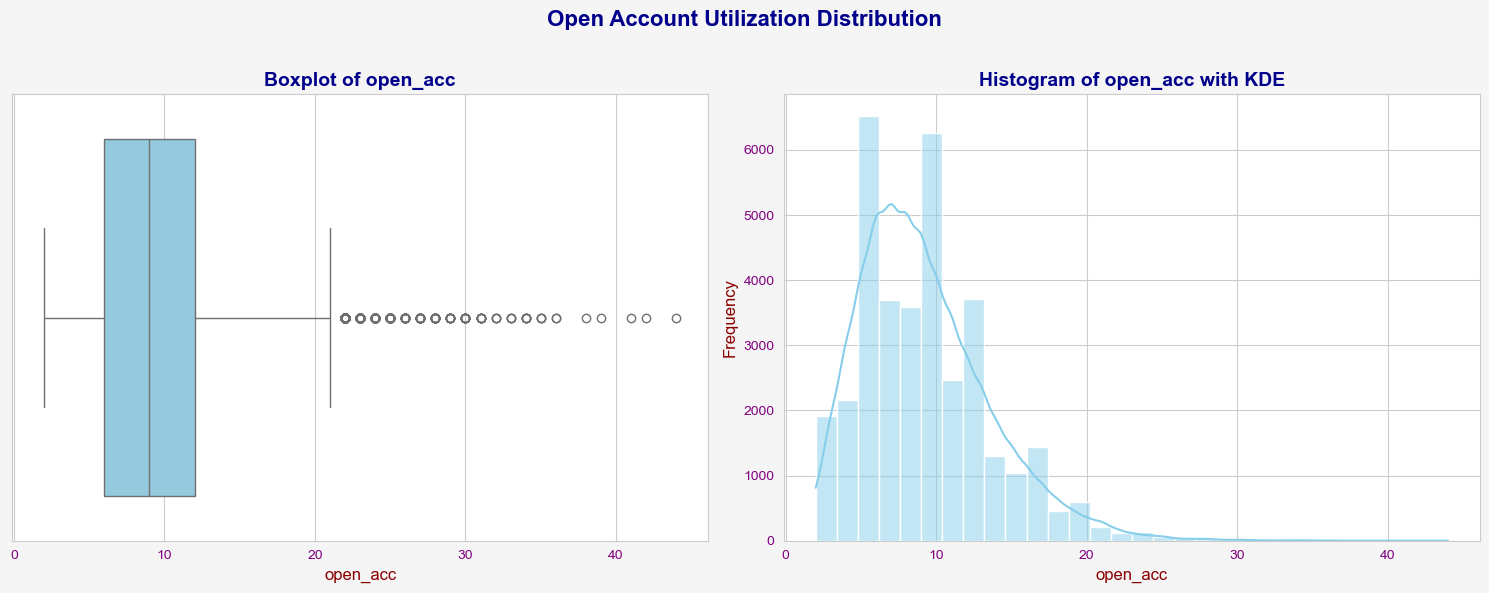

In [62]:
title = 'Open Account Utilization Distribution'
plot_box_hist_kde(loan_df, 'open_acc', title)

- ***Total Account***

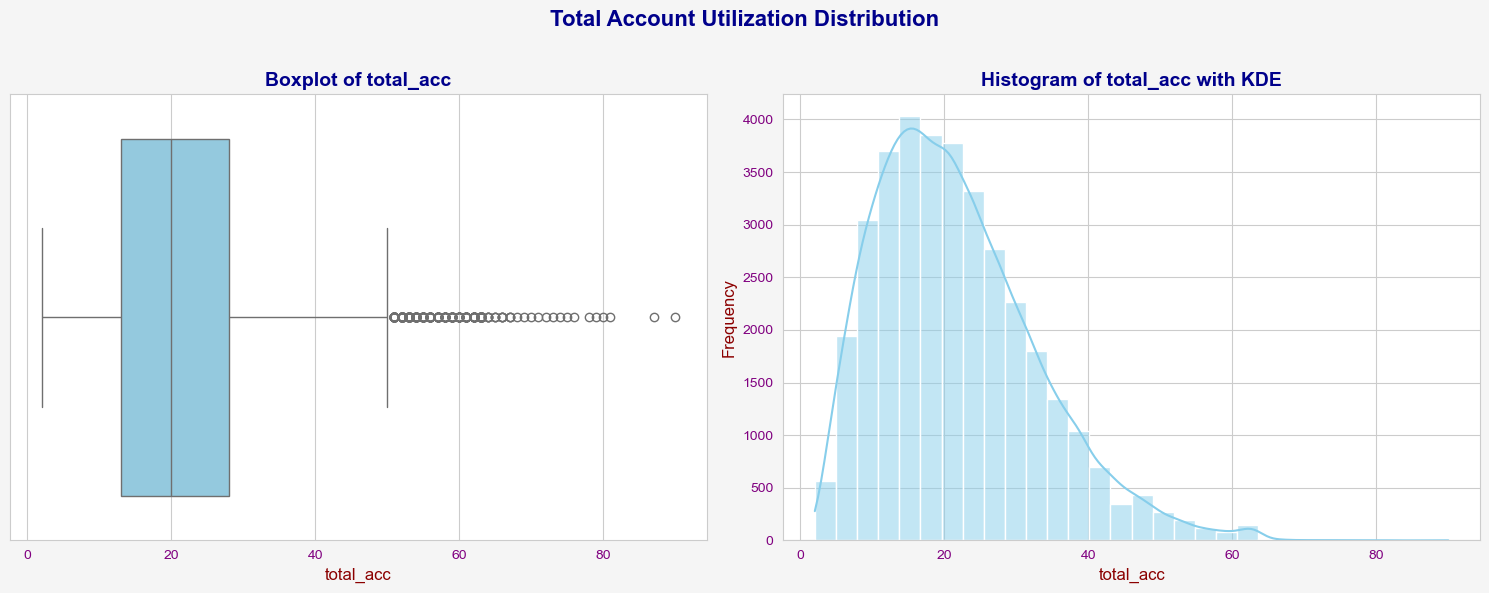

In [63]:
title = 'Total Account Utilization Distribution'
plot_box_hist_kde(loan_df, 'total_acc', title)

- ***Debt-to-Income Ratio***

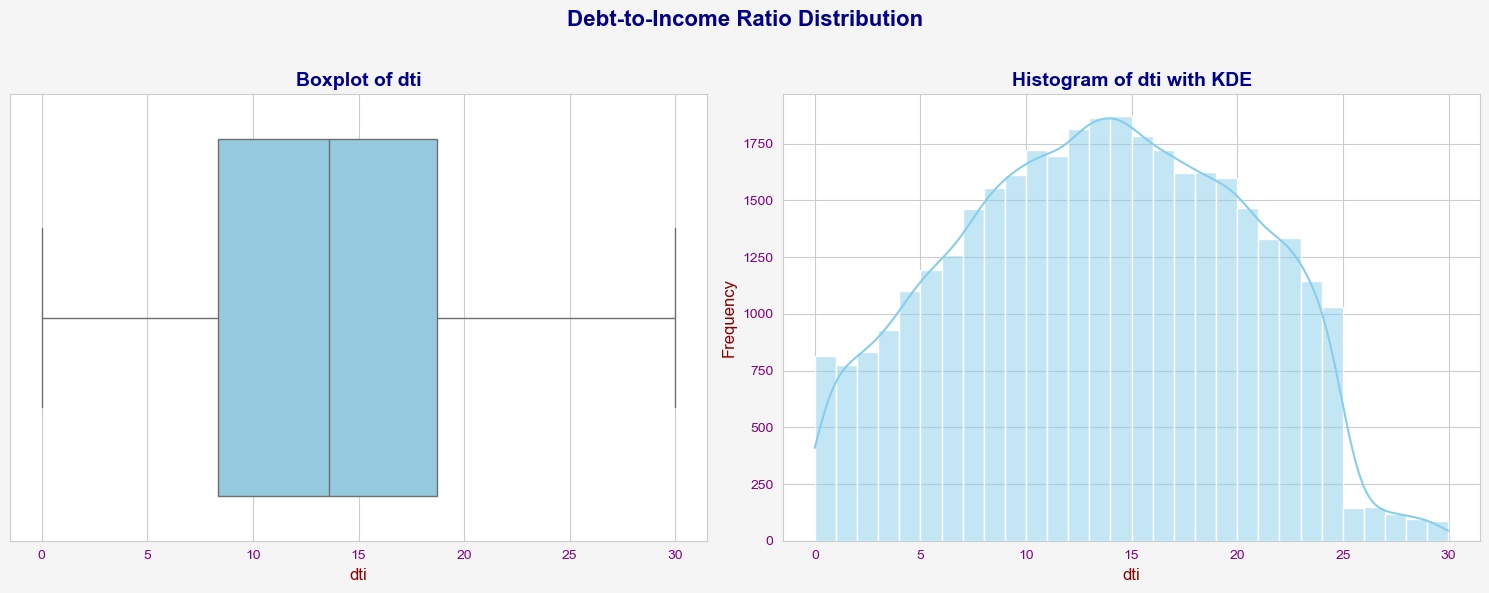

In [64]:
title = 'Debt-to-Income Ratio Distribution'
plot_box_hist_kde(loan_df, 'dti', title)

- ***Public Records***

pub_rec
0    33864
1     1852
2       44
3        6
4        2
Name: count, dtype: int64


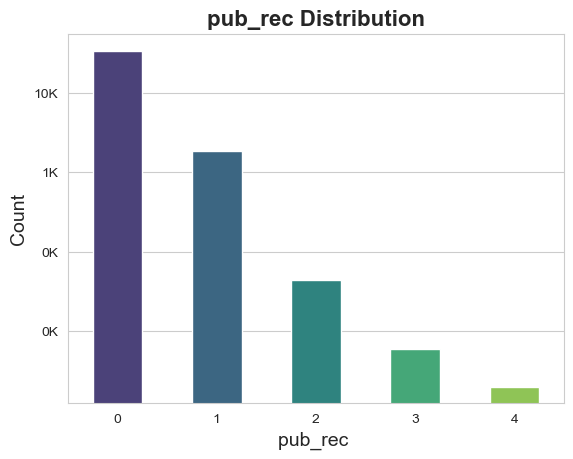

In [65]:
# pub_rec
print((loan_df['pub_rec'].value_counts()))

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the countplot
ax = sns.countplot(x='pub_rec', data=loan_df, palette='viridis', width=0.5)
ax.set(yscale='log')
# Add title and labels
ax.set_title('pub_rec Distribution', fontsize=16, weight='bold')
ax.set_xlabel('pub_rec ', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x * 1e-3)}K'))

plt.show()

- ***Delinqent***

delinq_2yrs
0     31898
1      2981
2       599
3       197
4        56
5        19
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64


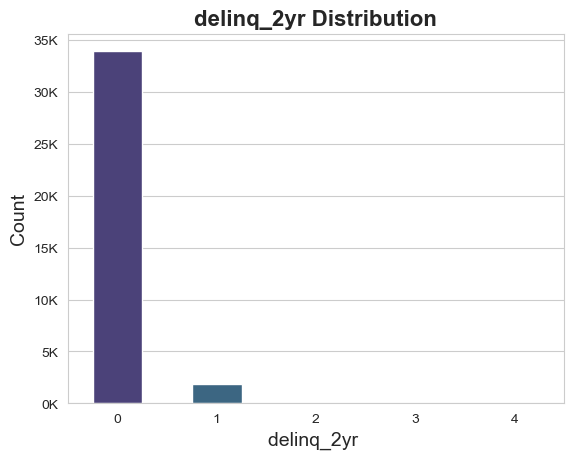

In [66]:
# delinq_2yr
print((loan_df['delinq_2yrs'].value_counts()))

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the countplot
ax = sns.countplot(x='pub_rec', data=loan_df, palette='viridis', width=0.5)

# Add title and labels
ax.set_title('delinq_2yr Distribution', fontsize=16, weight='bold')
ax.set_xlabel('delinq_2yr ', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x * 1e-3)}K'))

plt.show()

## 4.2 Segmented Univariate Analysis

In [67]:
# Calculate proportions
def calculate_proportions(data, group_column, target_column):
    """
    Calculates and displays the proportions of target_column categories within each group_column category.

    Parameters:
    - data: pd.DataFrame, the DataFrame containing the data
    - group_column: str, the name of the column to group by
    - target_column: str, the name of the target column to calculate proportions for

    Returns:
    - proportions_df: pd.DataFrame, the DataFrame containing the calculated proportions
    """
    # Calculate counts
    counts = data.groupby([group_column, target_column]).size().unstack().fillna(0)

    # Calculate proportions
    proportions = counts.div(counts.sum(axis=0), axis=1)

    print(f'The relative frequency of each {target_column} within each {group_column}\n{proportions}')

    return proportions

- ***Home Ownership vs Loan Status***

The relative frequency of each loan_status within each home_ownership
loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE               0.41        0.43
NONE                   0.00        0.00
OTHER                  0.00        0.00
OWN                    0.08        0.07
RENT                   0.51        0.49


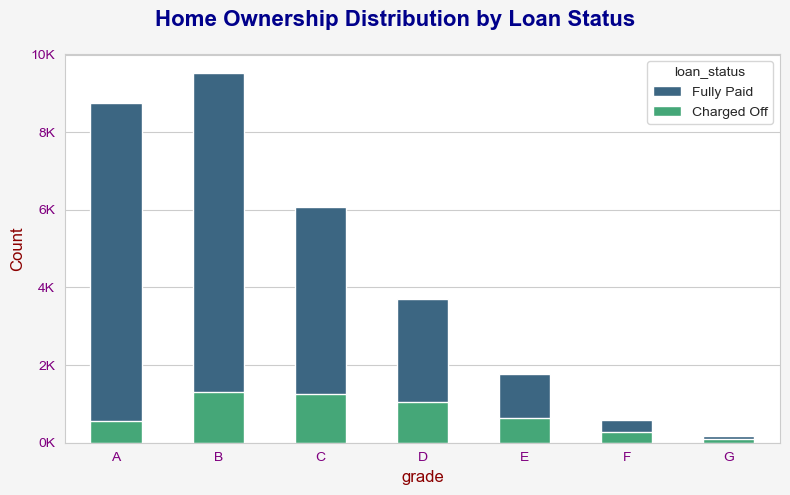

In [68]:
calculate_proportions(loan_df, 'home_ownership', 'loan_status')
title = 'Home Ownership Distribution by Loan Status'
count_plot(loan_df, 'grade', title, color_palette='viridis', hue='loan_status', count=False)

- ***Employemnt length vs loan Status***

The relative frequency of each loan_status within each emp_length
loan_status  Charged Off  Fully Paid
emp_length                          
< 1 year            0.13        0.13
2 years             0.12        0.13
3 years             0.11        0.12
4 years             0.09        0.10
5 years             0.09        0.09
6 years             0.06        0.06
7 years             0.05        0.05
8 years             0.04        0.04
9 years             0.03        0.04
10+ years           0.27        0.24


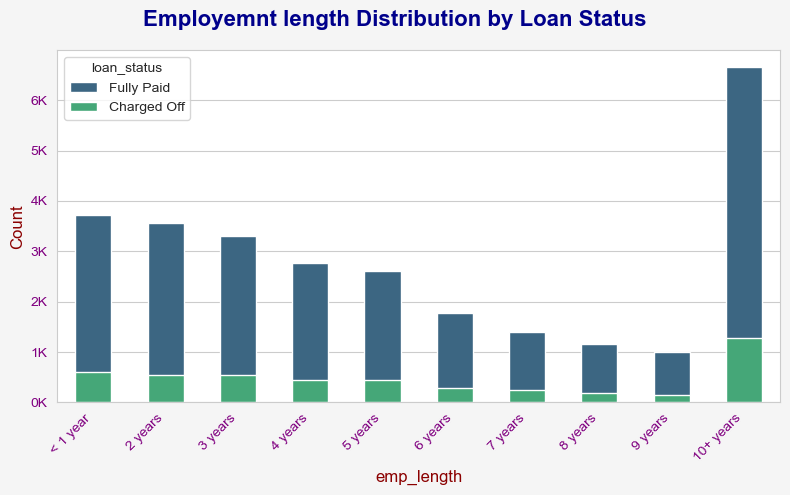

In [69]:
calculate_proportions(loan_df, 'emp_length', 'loan_status')
title = 'Employemnt length Distribution by Loan Status'
count_plot(loan_df, 'emp_length', title, color_palette='viridis', hue='loan_status', count=False, rotate=True)

- ***Verification Status by Loan Status***

The relative frequency of each loan_status within each verification_status
loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified                0.39        0.45
Source Verified             0.26        0.25
Verified                    0.36        0.29


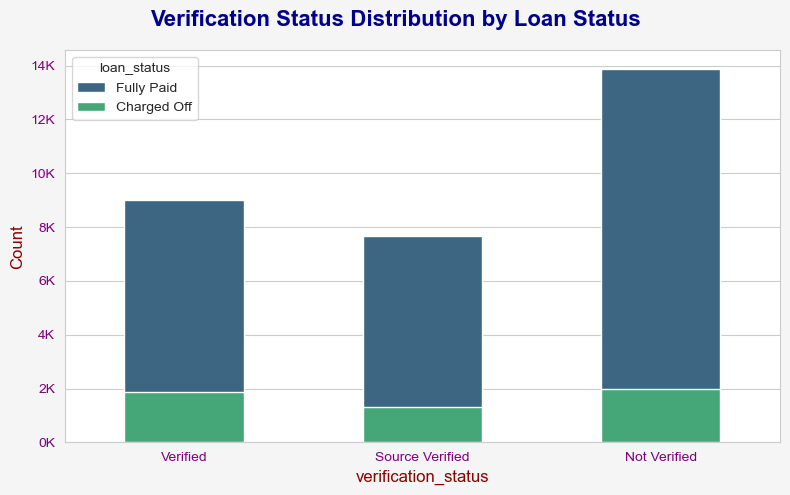

In [70]:
calculate_proportions(loan_df, 'verification_status', 'loan_status')
title = 'Verification Status Distribution by Loan Status'
count_plot(loan_df, 'verification_status', title, color_palette='viridis', hue='loan_status', count=False)

- ***Purpose by Loan Status***

The relative frequency of each loan_status within each purpose
loan_status         Charged Off  Fully Paid
purpose                                    
car                        0.03        0.04
credit_card                0.09        0.14
debt_consolidation         0.50        0.47
educational                0.01        0.01
home_improvement           0.06        0.07
house                      0.01        0.01
major_purchase             0.04        0.06
medical                    0.02        0.02
moving                     0.02        0.01
other                      0.11        0.10
renewable_energy           0.00        0.00
small_business             0.08        0.04
vacation                   0.01        0.01
wedding                    0.02        0.03


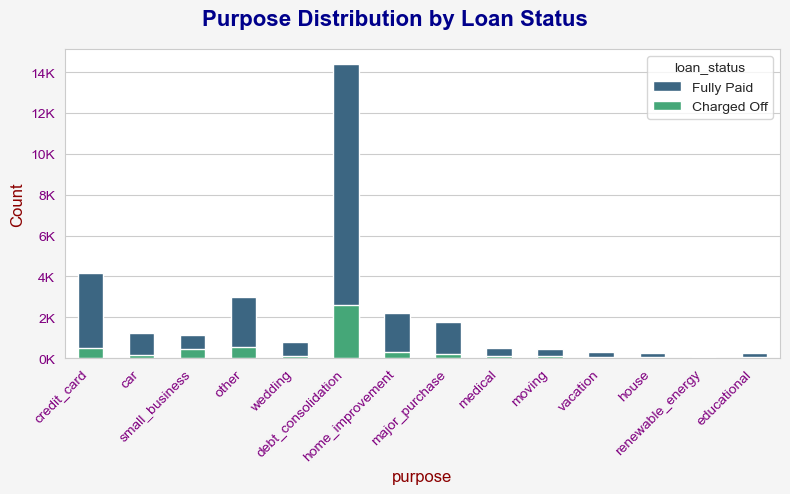

In [71]:
calculate_proportions(loan_df, 'purpose', 'loan_status')
title = 'Purpose Distribution by Loan Status'
count_plot(loan_df, 'purpose', title, color_palette='viridis', hue='loan_status', count=False, rotate=True)

***Inference*** : Overall, debt consolidation and credit card purposes dominate the loan landscape, with debt consolidation being the most significant. Small business loans, however, show a higher risk of default.

- ***Term by Loan Status***

The relative frequency of each loan_status within each term
loan_status  Charged Off  Fully Paid
term                                
36                  0.57        0.79
60                  0.43        0.21


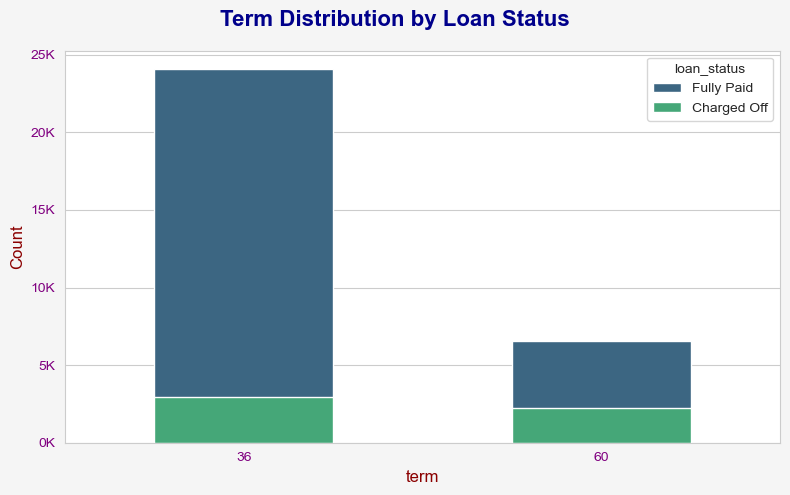

In [72]:
calculate_proportions(loan_df, 'term', 'loan_status')
title = 'Term Distribution by Loan Status'
count_plot(loan_df, 'term', title, color_palette='viridis', hue='loan_status', count=False)

- ***Delinqent by Loan Status***

The relative frequency of each loan_status within each delinq_2yrs
loan_status  Charged Off  Fully Paid
delinq_2yrs                         
0                   0.88        0.89
1                   0.09        0.08
2                   0.02        0.02
3                   0.01        0.01
4                   0.00        0.00
5                   0.00        0.00
6                   0.00        0.00
7                   0.00        0.00
8                   0.00        0.00
9                   0.00        0.00
11                  0.00        0.00


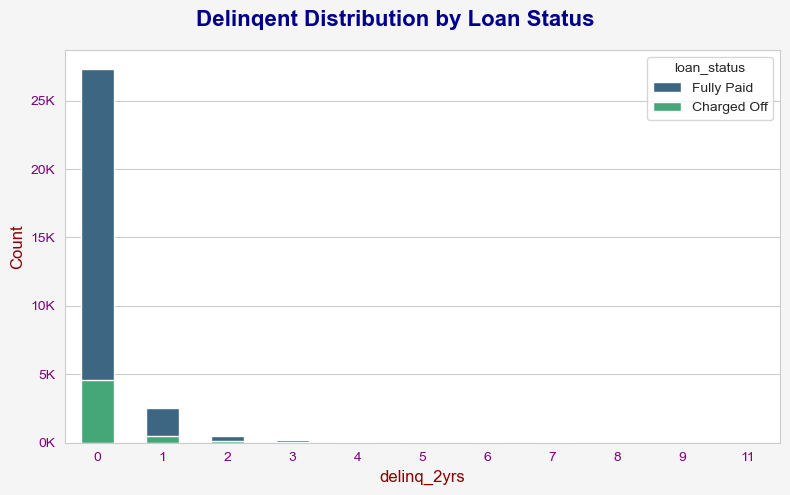

In [73]:
calculate_proportions(loan_df, 'delinq_2yrs', 'loan_status')
title = 'Delinqent Distribution by Loan Status'
count_plot(loan_df, 'delinq_2yrs', title, color_palette='viridis', hue='loan_status', count=False)

- ***Public Records***

The relative frequency of each loan_status within each pub_rec
loan_status  Charged Off  Fully Paid
pub_rec                             
0                   0.92        0.95
1                   0.08        0.05
2                   0.00        0.00
3                   0.00        0.00
4                   0.00        0.00


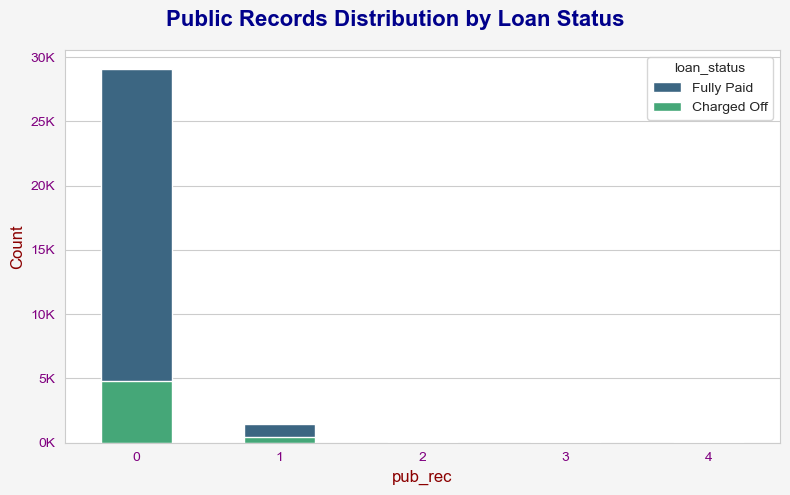

In [74]:
calculate_proportions(loan_df, 'pub_rec', 'loan_status')
title = 'Public Records Distribution by Loan Status'
count_plot(loan_df, 'pub_rec', title, color_palette='viridis', hue='loan_status', count=False)

In [75]:
def plot_hist_count(data, column, bins_column, hue_column, title):
    """
    Plots the distribution of a specified column by a hue column using a KDE plot with histogram and a count plot.

    Parameters:
    - data: pd.DataFrame, the DataFrame containing the data
    - column: str, the name of the column to visualize
    - hue_column: str, the name of the hue column
    - bins_column: str, the name of the binned column
    """
    
    # Setting up the subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Formatting Figure
    fig.suptitle(title, fontsize=16, fontweight='bold', color='darkblue')
    fig.patch.set_facecolor('#f5f5f5')  # Background color for the figure

    # First subplot: KDE plot with histogram
    sns.histplot(data=data, x=column, hue=hue_column, bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {column} by {hue_column} (KDE)', fontsize=16, fontweight='bold', color='navy')
    axes[0].set_xlabel(column, fontsize=14, color='darkred')
    axes[0].set_ylabel('Density', fontsize=14, color='darkred')

    # Second subplot: Count plot with hue
    sns.countplot(x=bins_column, hue=hue_column, data=data, palette='viridis', dodge=False, ax=axes[1])
    axes[1].set_title(f'Distribution of {column} by {hue_column} (Count)', fontsize=16, fontweight='bold', color='navy')
    axes[1].set_xlabel(column, fontsize=14, color='darkred')
    axes[1].set_ylabel('Count', fontsize=14, color='darkred')

    # Customize ticks and labels
    axes[0].tick_params(axis='x', colors='purple')
    axes[0].tick_params(axis='y', colors='purple')
    axes[1].tick_params(axis='x', colors='purple')
    axes[1].tick_params(axis='y', colors='purple')

    # Format y-axis labels with thousands separator
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * 1e-3)}K'))
    axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * 1e-3)}K'))
    


    # Adjust layout
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


- ***Loan Amount by Loan Status***

The relative frequency of each loan_status within each loan_amnt_bins
loan_status     Charged Off  Fully Paid
loan_amnt_bins                         
0-10k                  0.44        0.50
10k-20k                0.34        0.34
20k-30k                0.18        0.13
30k-40k                0.05        0.03


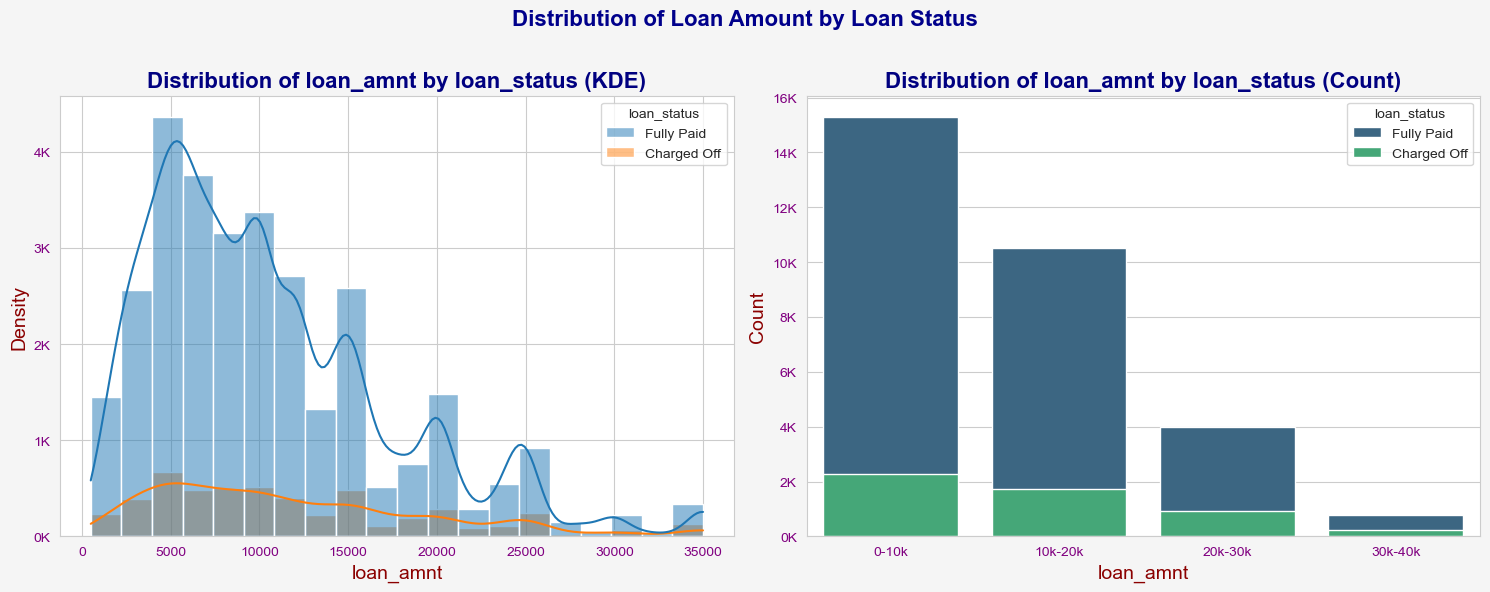

In [76]:
calculate_proportions(loan_df, 'loan_amnt_bins', 'loan_status')
title = 'Distribution of Loan Amount by Loan Status'
plot_hist_count(loan_df, 'loan_amnt', 'loan_amnt_bins', 'loan_status', title)

- ***Funded Amount by Loan Status***

The relative frequency of each loan_status within each funded_amnt_bins
loan_status       Charged Off  Fully Paid
funded_amnt_bins                         
0-10k                    0.45        0.51
10k-20k                  0.35        0.35
20k-30k                  0.16        0.12
30k-40k                  0.04        0.02


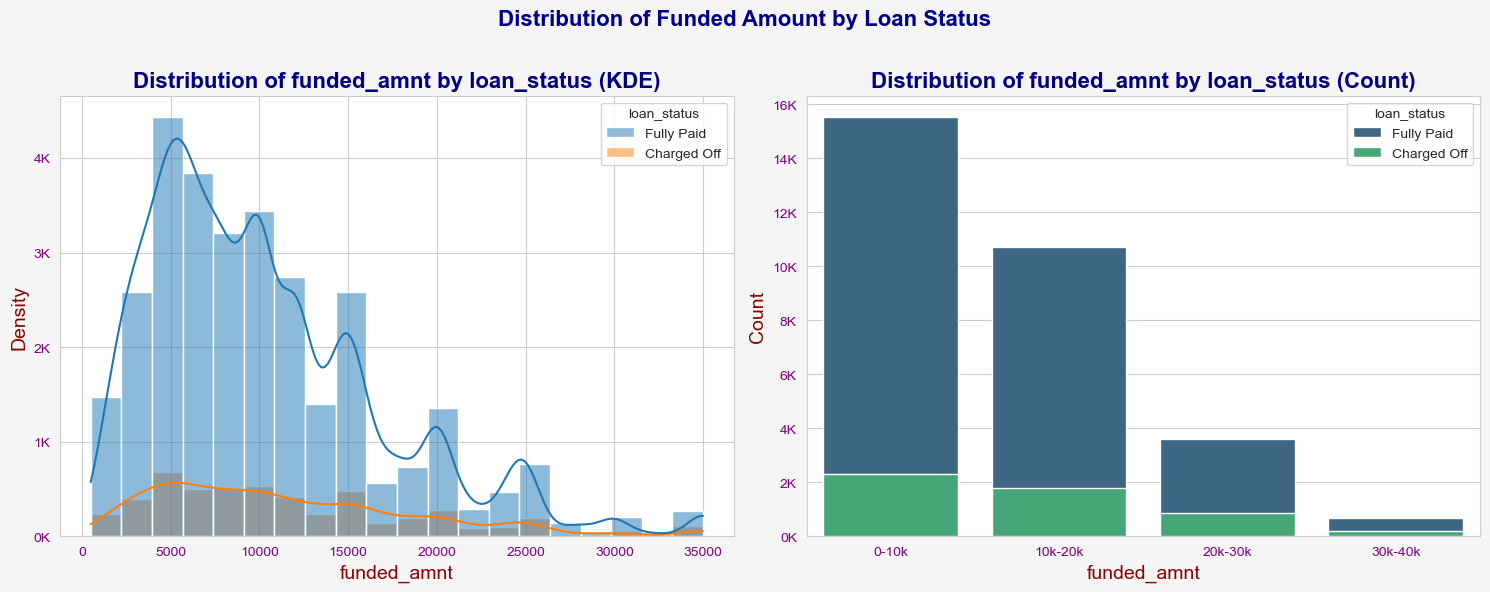

In [77]:
calculate_proportions(loan_df, 'funded_amnt_bins', 'loan_status')
title = 'Distribution of Funded Amount by Loan Status'
plot_hist_count(loan_df, 'funded_amnt', 'funded_amnt_bins', 'loan_status', title)

- ***Annual Income by Loan Status***

The relative frequency of each loan_status within each annual_income_bins
loan_status         Charged Off  Fully Paid
annual_income_bins                         
3k-31k                     0.17        0.13
31k-58k                    0.46        0.42
58k-85k                    0.24        0.27
85k-112k                   0.09        0.12
112k-140k                  0.04        0.06


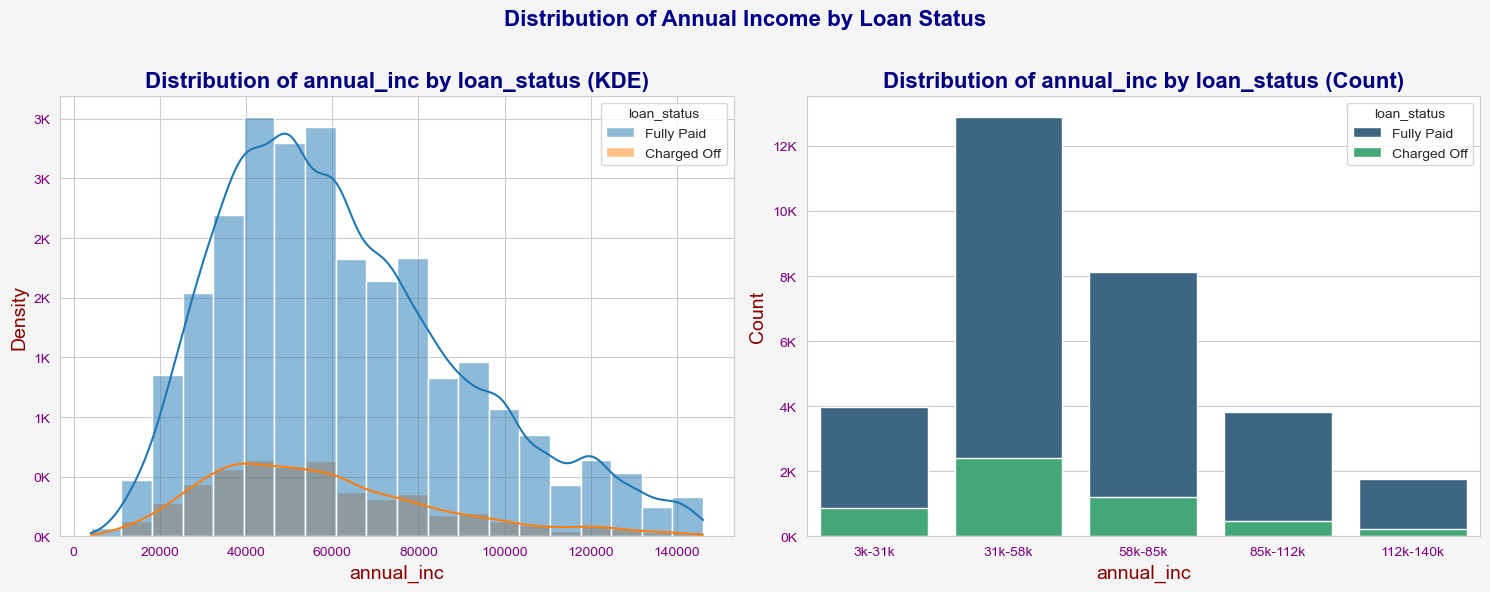

In [78]:
calculate_proportions(loan_df, 'annual_income_bins', 'loan_status')
title = 'Distribution of Annual Income by Loan Status'
plot_hist_count(loan_df, 'annual_inc', 'annual_income_bins', 'loan_status', title)

***Inference***: 
- There is a clear trend showing that as the income bracket increases, the proportion of charged-off loans decreases, and the proportion of fully paid loans increases. This suggests that higher income is associated with a lower risk of loan default.
- The moderate-income bracket (31k-58k) is the most common among both charged-off and fully paid loans, but it also shows a slightly higher risk of default compared to other income brackets.

- ***Interest Rate by Loan Status***

The relative frequency of each loan_status within each interest_rate_bins
loan_status         Charged Off  Fully Paid
interest_rate_bins                         
5%-9%                      0.10        0.28
9%-13%                     0.33        0.38
13%-17%                    0.36        0.27
17%-21%                    0.17        0.07
21%-25%                    0.04        0.01


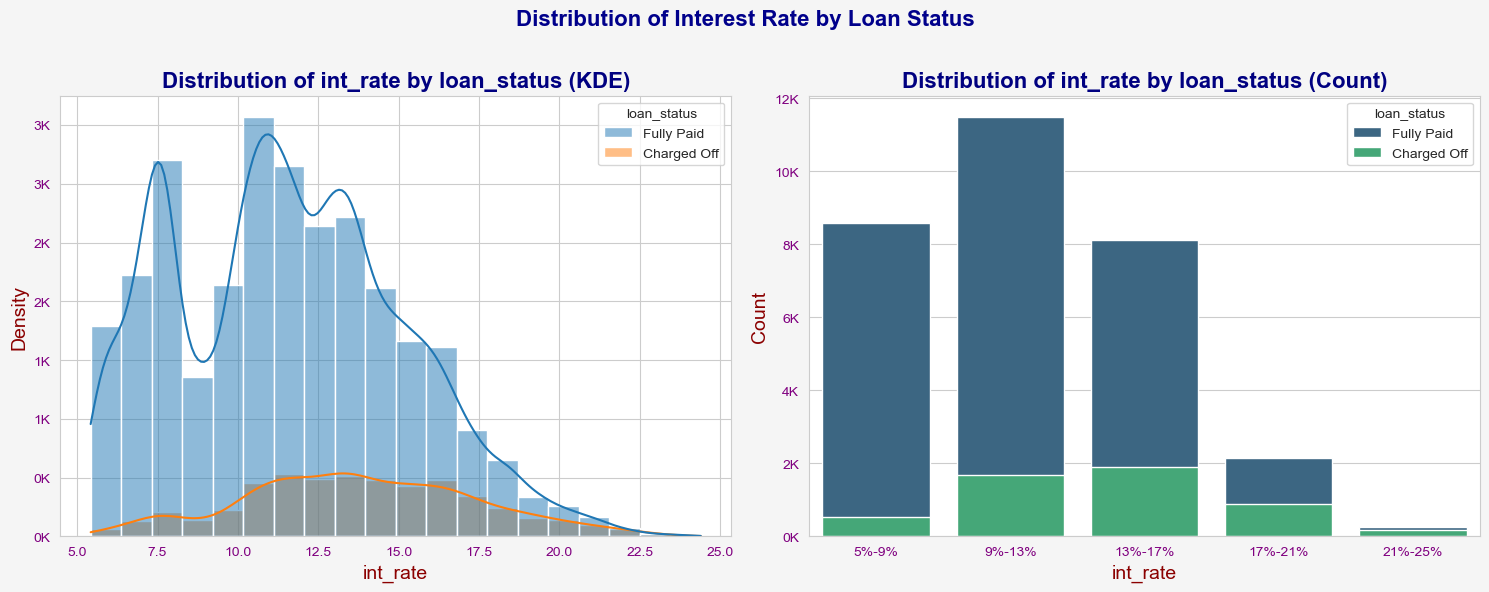

In [79]:
calculate_proportions(loan_df, 'interest_rate_bins', 'loan_status')
title = 'Distribution of Interest Rate by Loan Status'
plot_hist_count(loan_df, 'int_rate', 'interest_rate_bins', 'loan_status', title)

- ***Debt-to-Income-Ratio by Loan Status***

The relative frequency of each loan_status within each dti_bins
loan_status  Charged Off  Fully Paid
dti_bins                            
0-6                 0.13        0.16
6-12                0.24        0.26
12-18               0.31        0.30
18-24               0.27        0.23
24-30               0.05        0.05


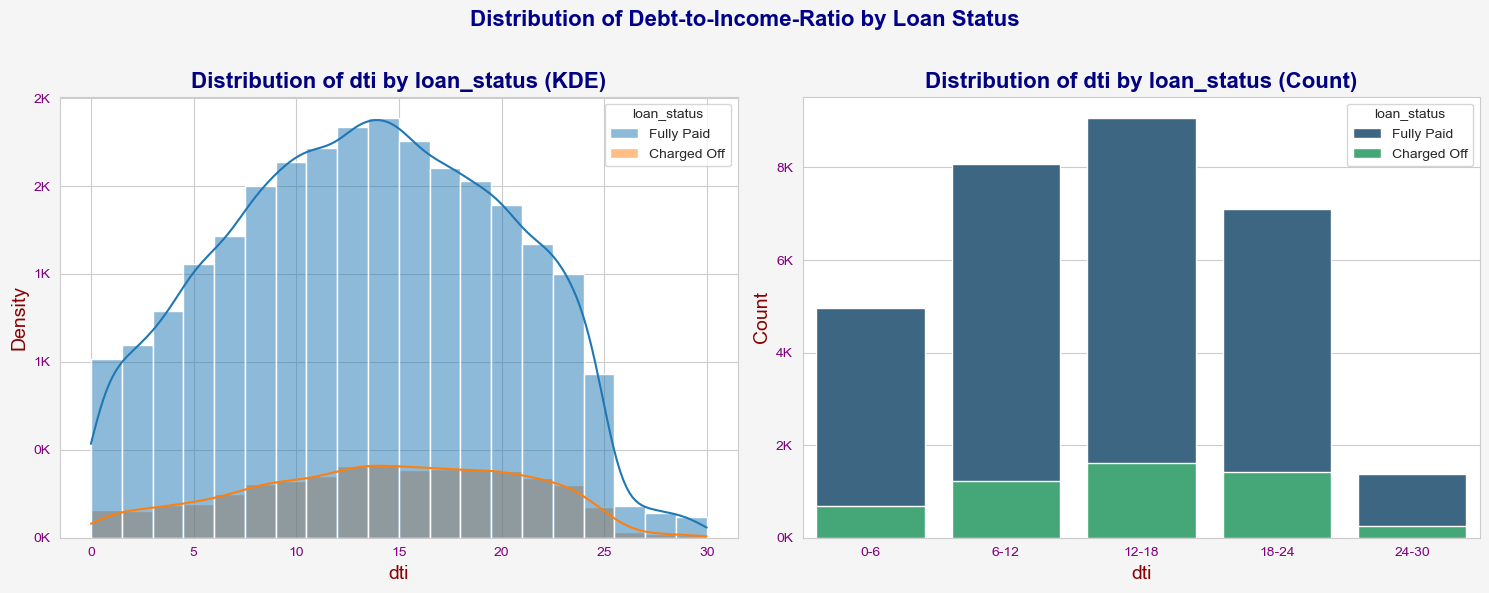

In [80]:
calculate_proportions(loan_df, 'dti_bins', 'loan_status')
title = 'Distribution of Debt-to-Income-Ratio by Loan Status'
plot_hist_count(loan_df, 'dti', 'dti_bins', 'loan_status', title)

- ***Open Account by Loan Status***

The relative frequency of each loan_status within each open_accounts_bins
loan_status         Charged Off  Fully Paid
open_accounts_bins                         
2-10                       0.68        0.67
10-19                      0.29        0.29
19-27                      0.03        0.03
27-36                      0.00        0.00
36-44                      0.00        0.00


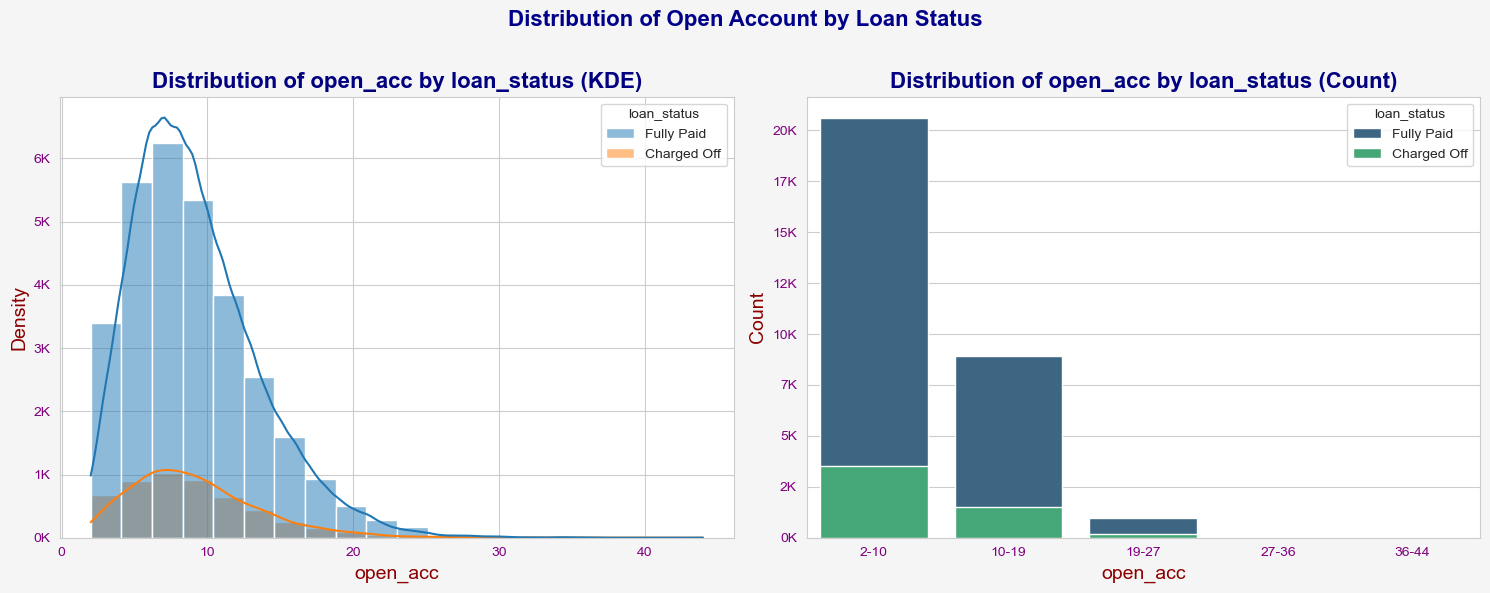

In [81]:
calculate_proportions(loan_df, 'open_accounts_bins', 'loan_status')
title = 'Distribution of Open Account by Loan Status'
plot_hist_count(loan_df, 'open_acc', 'open_accounts_bins', 'loan_status', title)

- ***Total Account by Loan Status***

The relative frequency of each loan_status within each total_accounts_bins
loan_status          Charged Off  Fully Paid
total_accounts_bins                         
2-20                        0.51        0.47
20-37                       0.40        0.43
37-55                       0.08        0.08
55-74                       0.01        0.01
74-90                       0.00        0.00


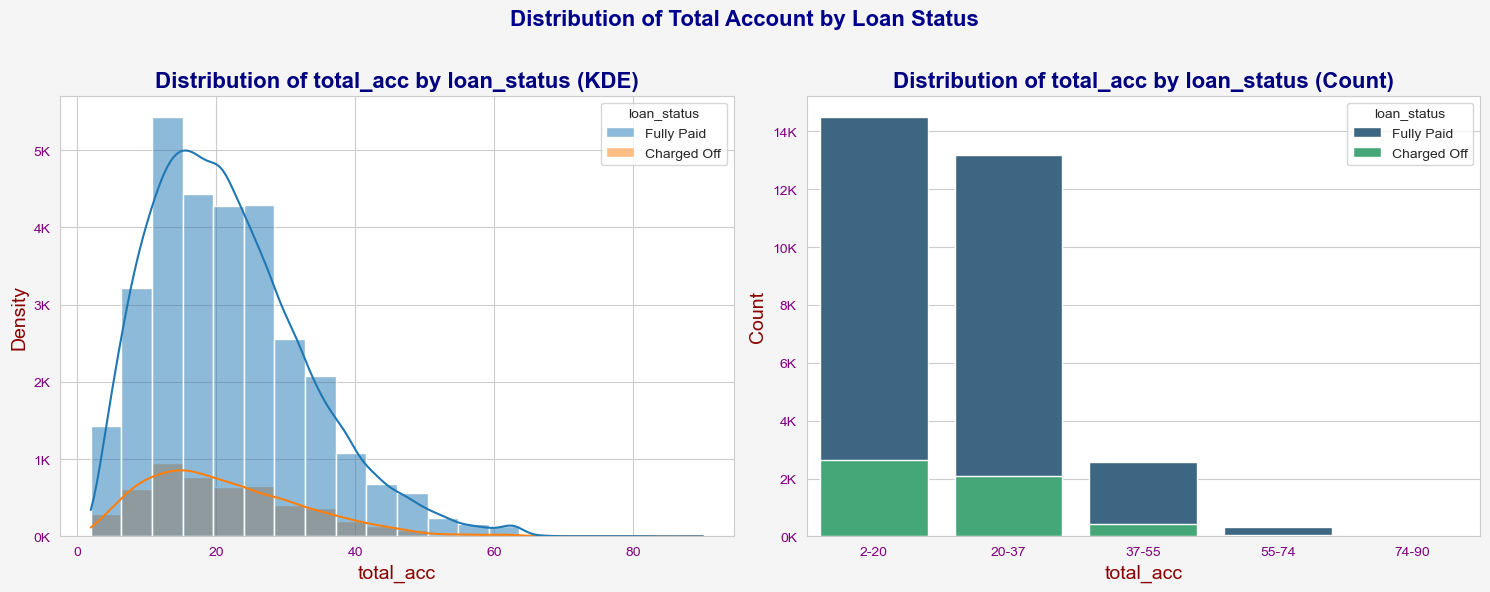

In [82]:
calculate_proportions(loan_df, 'total_accounts_bins', 'loan_status')
title = 'Distribution of Total Account by Loan Status'
plot_hist_count(loan_df, 'total_acc', 'total_accounts_bins', 'loan_status', title)

- ***Revolving Utilization by Loan Status***

The relative frequency of each loan_status within each revolving_utilization_bins
loan_status                 Charged Off  Fully Paid
revolving_utilization_bins                         
0-20                               0.14        0.21
20-40                              0.16        0.21
40-60                              0.22        0.22
60-80                              0.24        0.20
80-100                             0.24        0.16


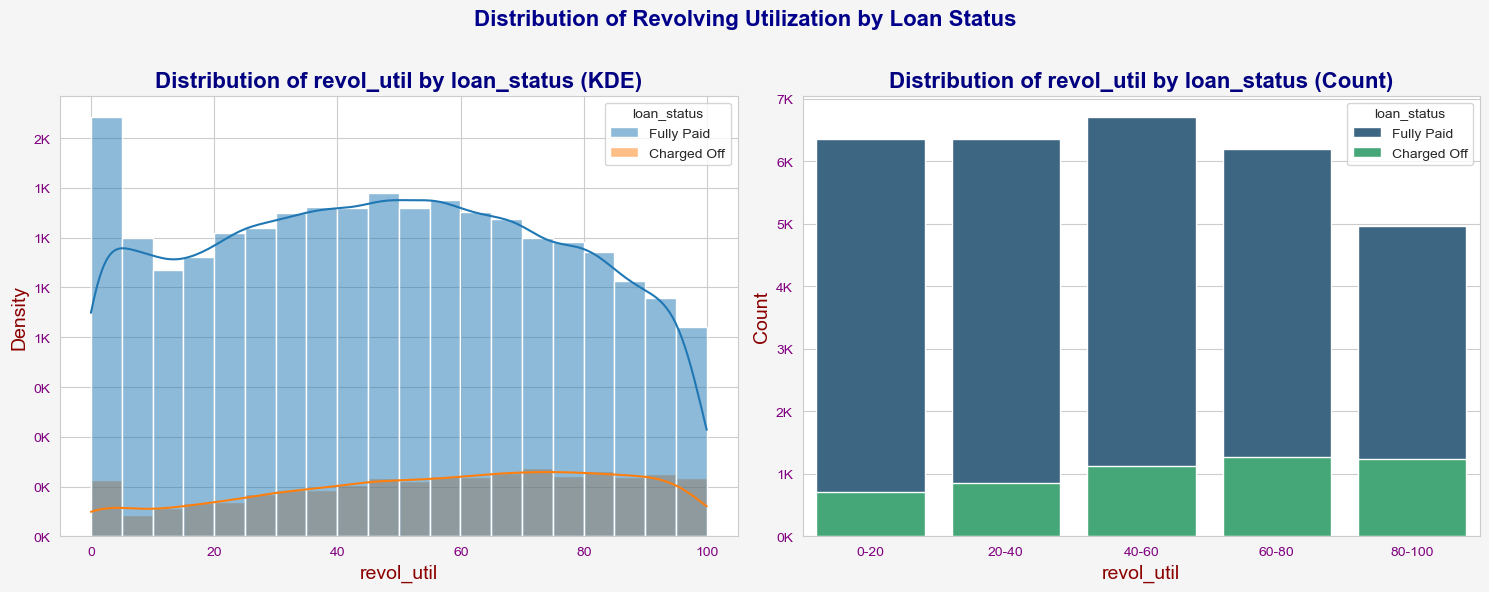

In [83]:
calculate_proportions(loan_df, 'revolving_utilization_bins', 'loan_status')
title = 'Distribution of Revolving Utilization by Loan Status'
plot_hist_count(loan_df, 'revol_util', 'revolving_utilization_bins', 'loan_status', title)

## 4.3 Bivariate Analysis

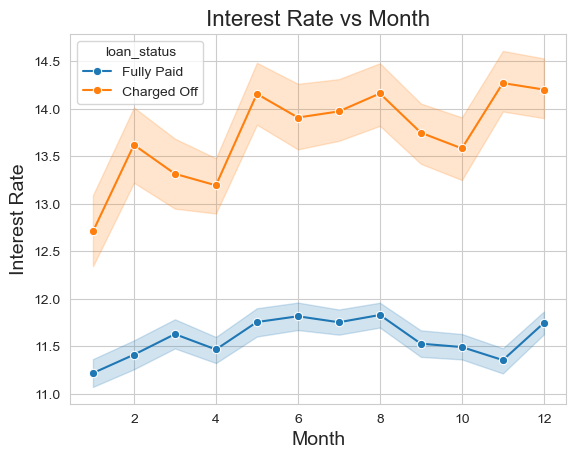

In [84]:
# int_rate vs month 
sns.lineplot(x='month', y='int_rate', data=loan_df, marker='o', hue='loan_status' )

plt.title('Interest Rate vs Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Interest Rate', fontsize=14)

plt.show()

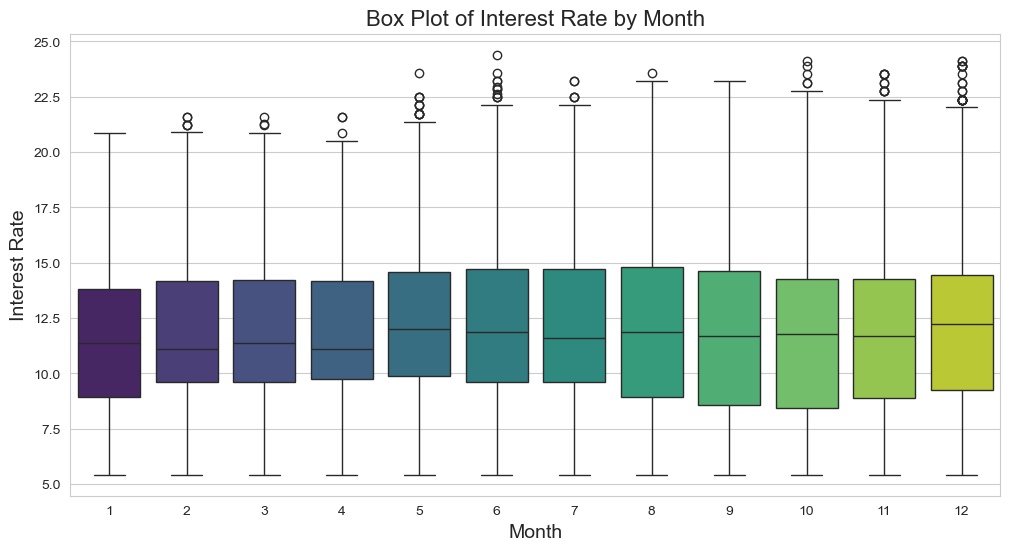

In [85]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='int_rate', data=loan_df, palette="viridis")
plt.title('Box Plot of Interest Rate by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Interest Rate', fontsize=14)
plt.show()

- The median interest rates (indicated by the line within each box) are fairly consistent across the months, mostly ranging between 10% and 12%.
- There are several outliers in the data, particularly in the months of May, June, July, November, and December. These outliers indicate instances where the interest rates were significantly higher than the typical range for those months.
- The presence of outliers in these months suggests that there may have been specific events or conditions causing higher interest rates during these periods.

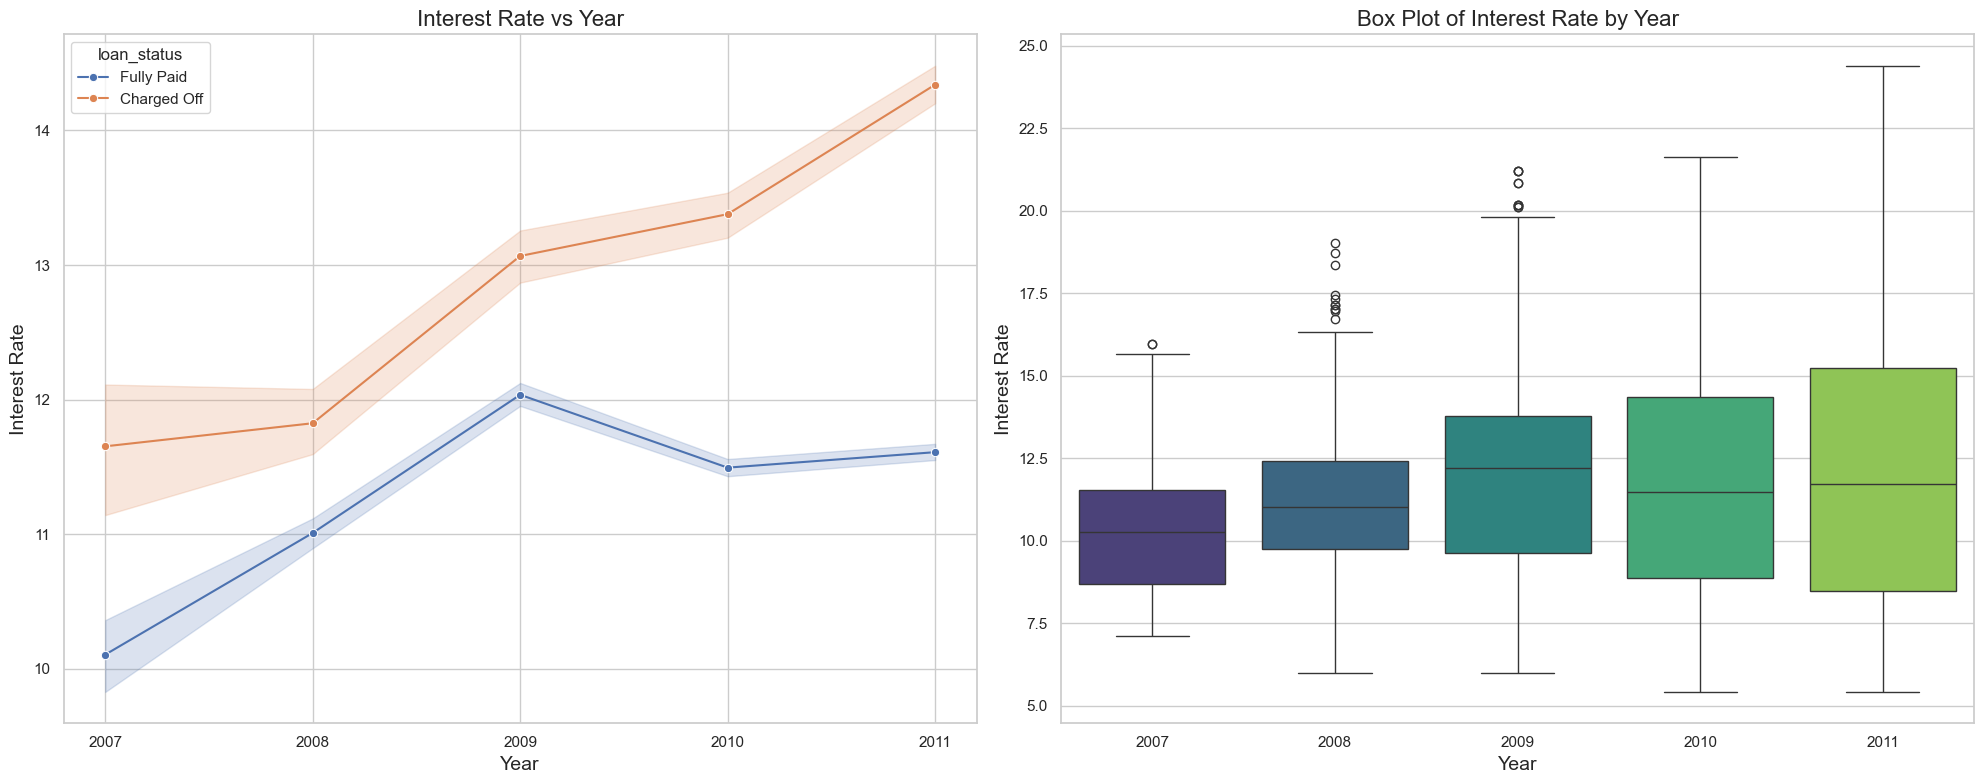

In [86]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.lineplot(ax=axes[0], x='year', y='int_rate', hue='loan_status', data=loan_df, marker='o')
axes[0].set_title('Interest Rate vs Year', fontsize=16)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('Interest Rate', fontsize=14)
years = loan_df['year'].unique()  
axes[0].set_xticks(years)

sns.boxplot(ax=axes[1], x='year', y='int_rate', data=loan_df, palette="viridis")
axes[1].set_title('Box Plot of Interest Rate by Year', fontsize=16)
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Interest Rate', fontsize=14)

plt.tight_layout()

plt.show()

1. Higher Interest Rates and Default Risk:

- Charged-off loans consistently have higher interest rates compared to fully paid loans across all years, indicating a strong correlation between higher interest rates and increased default risk.

2. Rising Interest Rates Over Time:

- Both fully paid and charged-off loans show an increasing trend in interest rates from 2007 to 2011, with a more pronounced rise for charged-off loans. This trend suggests tightening lending conditions and possibly increased risk over time.

3. Interest Rate Variability:

- There is significant variability in interest rates within each year, with higher median rates and a wider spread in recent years, particularly for charged-off loans. This highlights the need for careful risk assessment and possible reconsideration of interest rate strategies to reduce defaults.

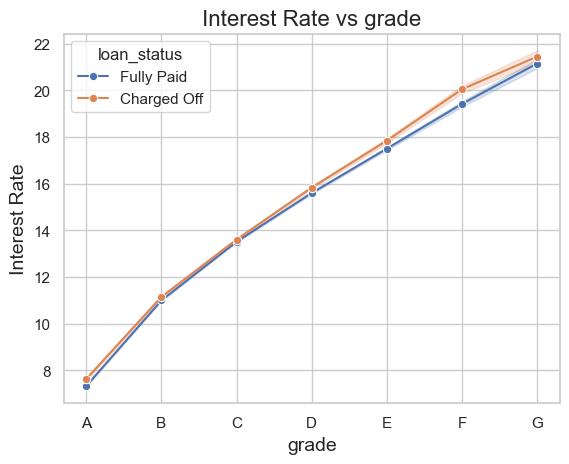

In [87]:
# int_rate vs grade 
sns.lineplot(x='grade', y='int_rate', data=loan_df, marker='o', hue='loan_status' )

plt.title('Interest Rate vs grade', fontsize=16)
plt.xlabel('grade', fontsize=14)
plt.ylabel('Interest Rate', fontsize=14)

plt.show()

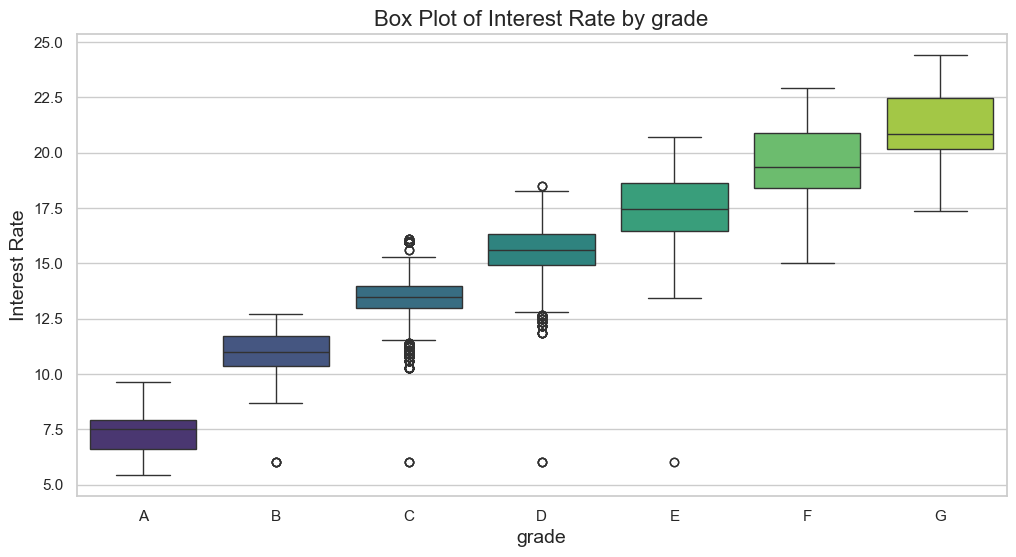

In [88]:
# int_rate vs grade 
plt.figure(figsize=(12, 6))
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.boxplot(x='grade', y='int_rate', data=loan_df, order=grade_order, palette="viridis")
plt.title('Box Plot of Interest Rate by grade', fontsize=16)
plt.xlabel('grade', fontsize=14)
plt.ylabel('Interest Rate', fontsize=14)
plt.show()

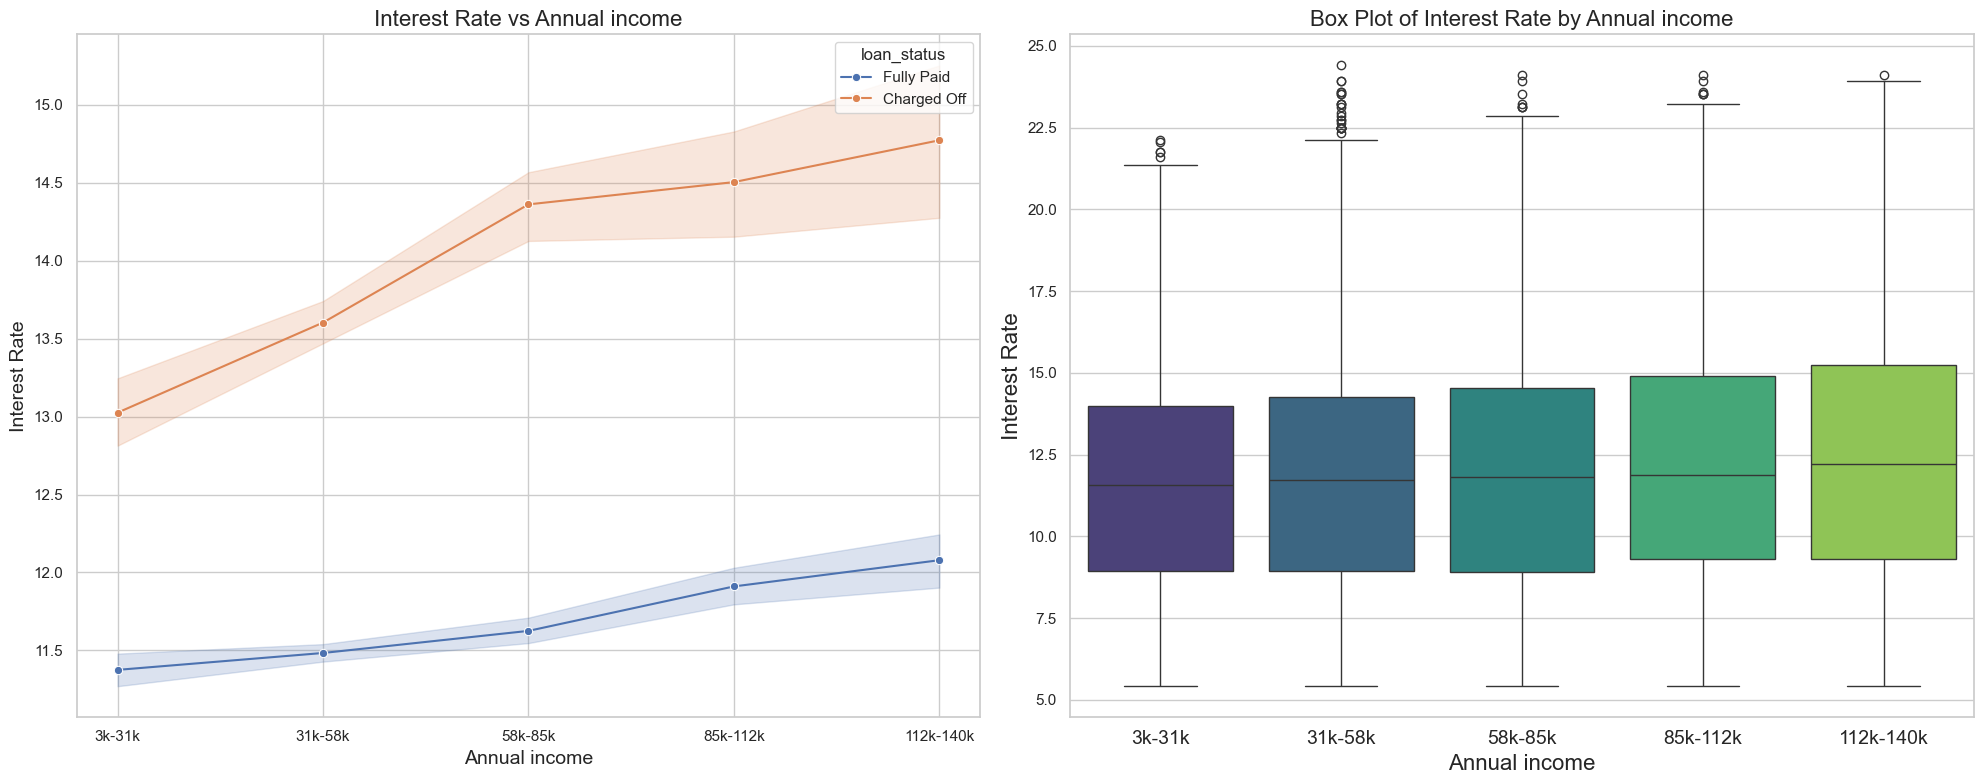

In [89]:
# annual_inc vs int_rate
sns.set(style="whitegrid")
fig, axes = plt.subplots(1,2,figsize=(20, 8))
sns.lineplot(ax=axes[0], x='annual_income_bins', y='int_rate', hue='loan_status', data=loan_df, marker='o')
axes[0].set_title('Interest Rate vs Annual income', fontsize=16)
axes[0].set_xlabel('Annual income', fontsize=14)
axes[0].set_ylabel('Interest Rate', fontsize=14)

sns.boxplot(ax=axes[1], x='annual_income_bins', y='int_rate', data=loan_df, palette="viridis")
axes[1].set_title('Box Plot of Interest Rate by Annual income', fontsize=16)
axes[1].set_xlabel('Annual income', fontsize=16)
axes[1].set_ylabel('Interest Rate', fontsize=16)
axes[1].tick_params(axis='x', labelsize=14)
plt.tight_layout()
plt.show()

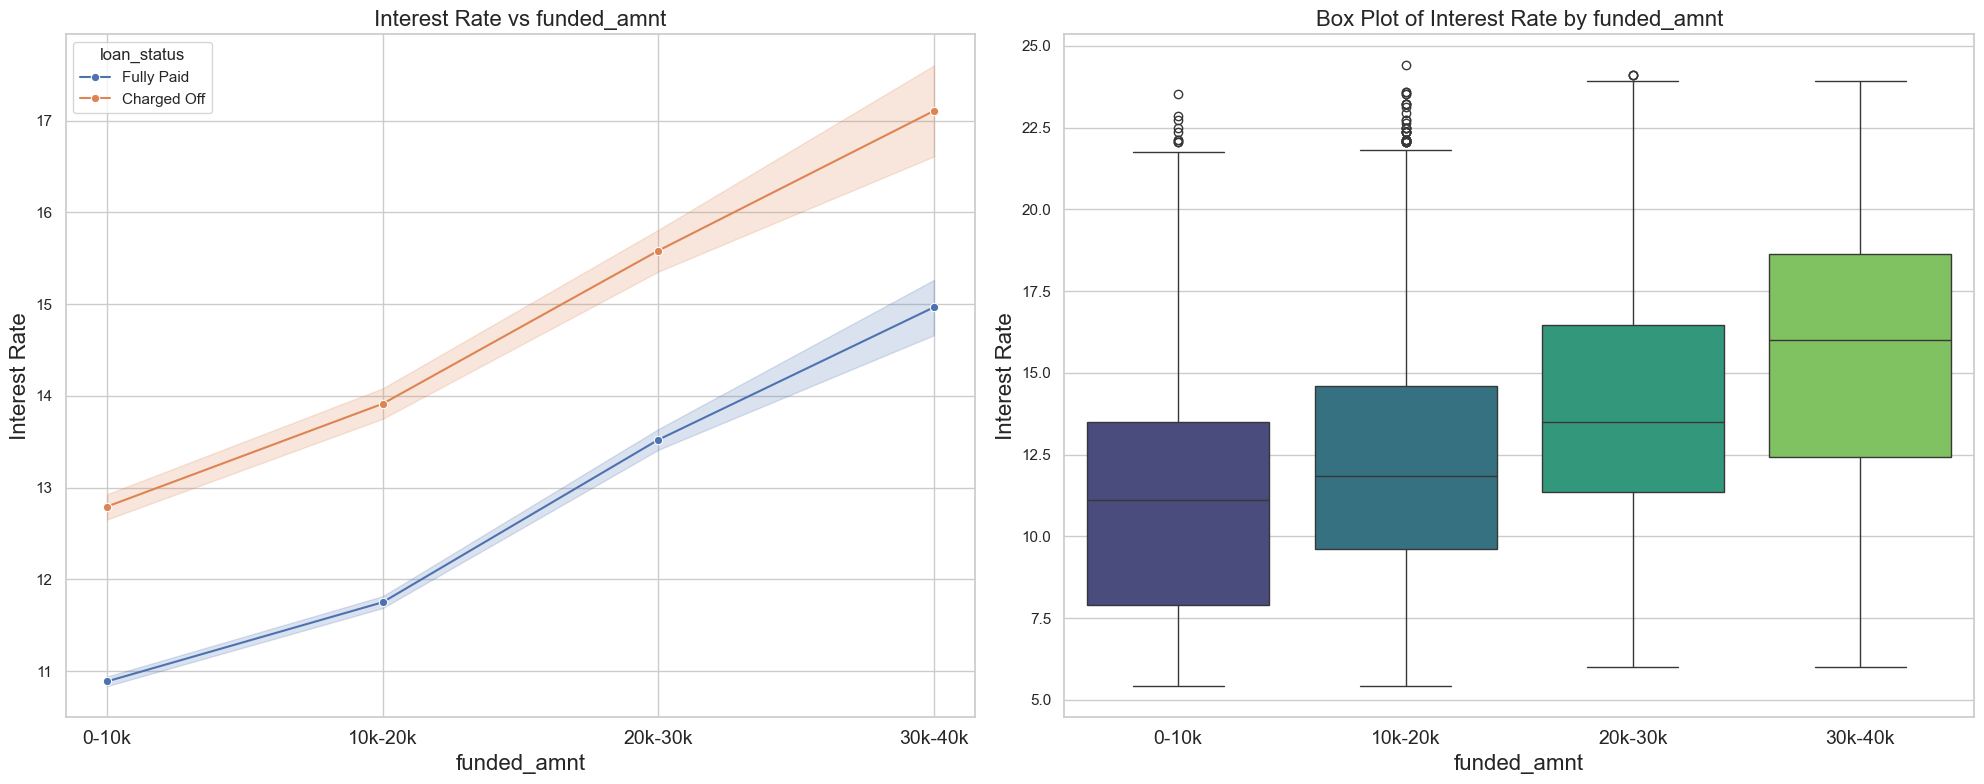

In [90]:
# funded_amnt vs int_rate
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.lineplot(ax=axes[0], x='funded_amnt_bins', y='int_rate', hue='loan_status', data=loan_df, marker='o')
axes[0].set_title('Interest Rate vs funded_amnt', fontsize=16)
axes[0].set_xlabel('funded_amnt', fontsize=16)
axes[0].set_ylabel('Interest Rate', fontsize=16)
axes[0].tick_params(axis='x', labelsize=14)

sns.boxplot(ax=axes[1], x='funded_amnt_bins', y='int_rate', data=loan_df, palette="viridis")
axes[1].set_title('Box Plot of Interest Rate by funded_amnt', fontsize=16)
axes[1].set_xlabel('funded_amnt', fontsize=16)
axes[1].set_ylabel('Interest Rate', fontsize=16)
axes[1].tick_params(axis='x', labelsize=14)
plt.tight_layout()

plt.show()

Insights:
- Loans that are charged off have higher interest rates across all funded amount bins compared to fully paid loans.
- There is a clear upward trend in interest rates as the funded amount increases, especially for charged-off loans.

- Higher funded amounts tend to have higher median interest rates.
- The spread of interest rates is wider for higher funded amount bins, indicating greater variability.

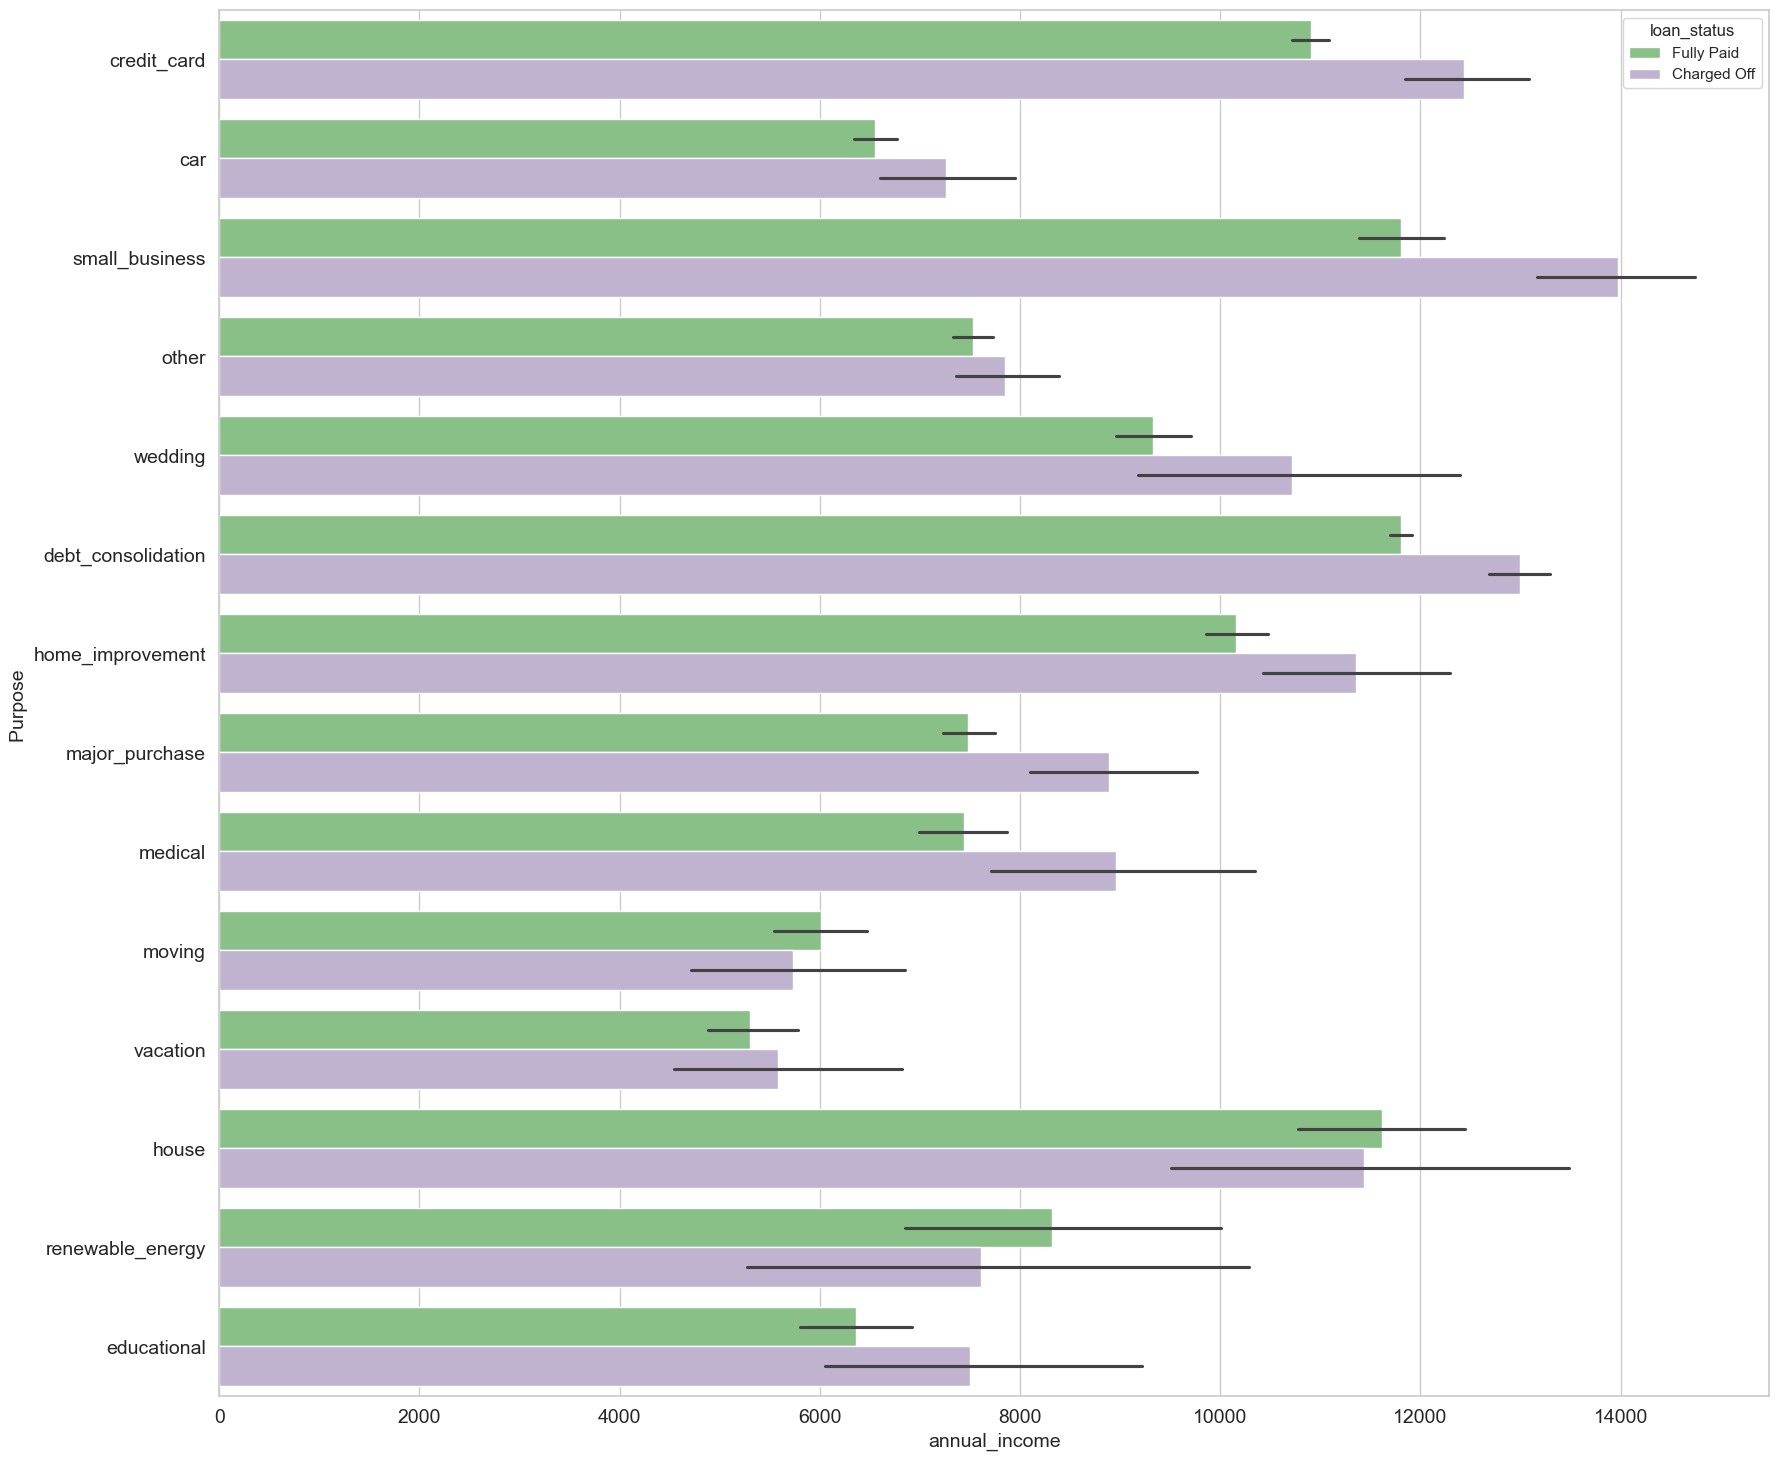

In [91]:
# annual_inc vs purpose
plt.figure(figsize=(20, 18))
sns.set_style("whitegrid")
ax = sns.barplot(x='funded_amnt', y='purpose', hue='loan_status', data=loan_df, palette="Accent")

# Add title and labels
ax.set_title('', fontsize=16, weight='bold')
ax.set_ylabel('Purpose ', fontsize=14)
ax.set_xlabel('annual_income', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

plt.show()

## 4.3 Multivariate Analysis


### Correlation
Correlation Matrix-Quantitative Variables

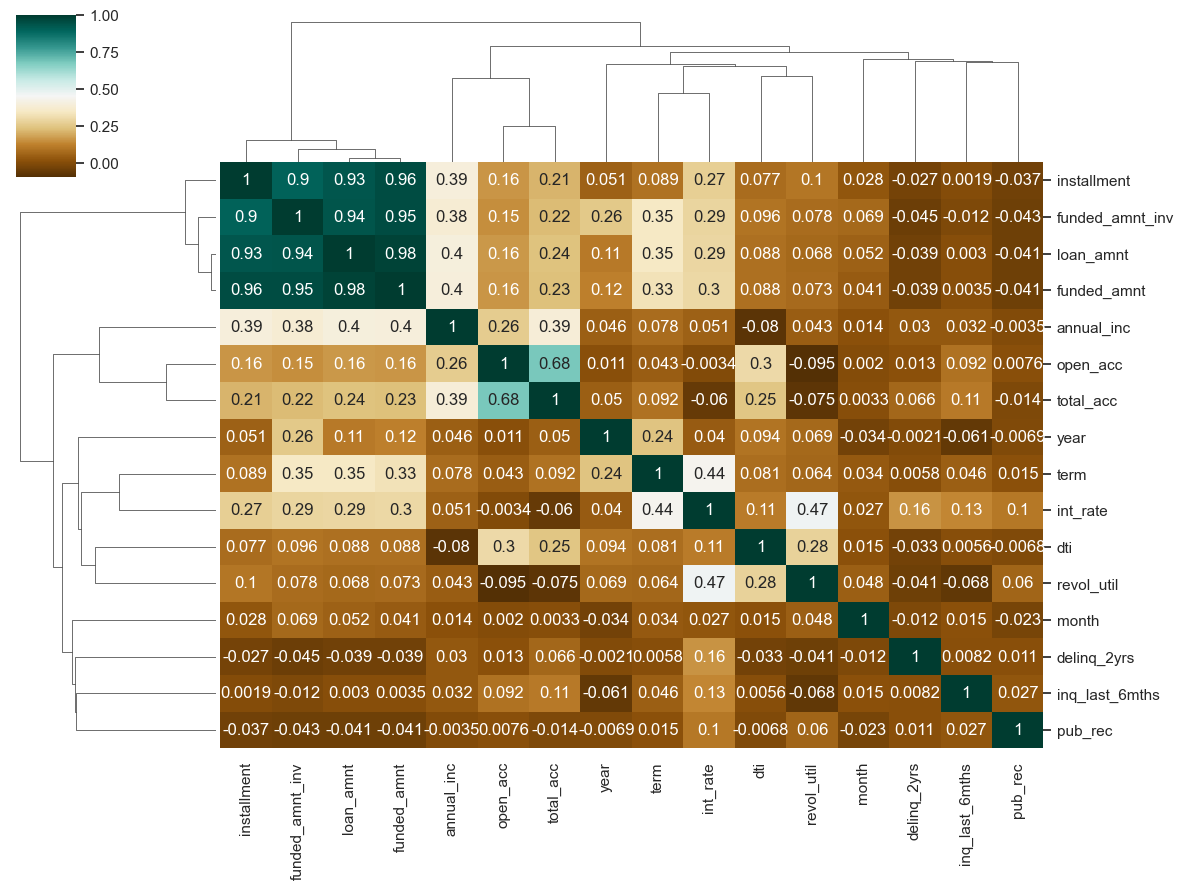

In [92]:
numerical_df = loan_df.select_dtypes(include=['float', 'int'])
corr_matrix = numerical_df.corr()
sns.clustermap(corr_matrix, annot=True, figsize=(12,9), cmap='BrBG')
plt.show()

### Pair Plot

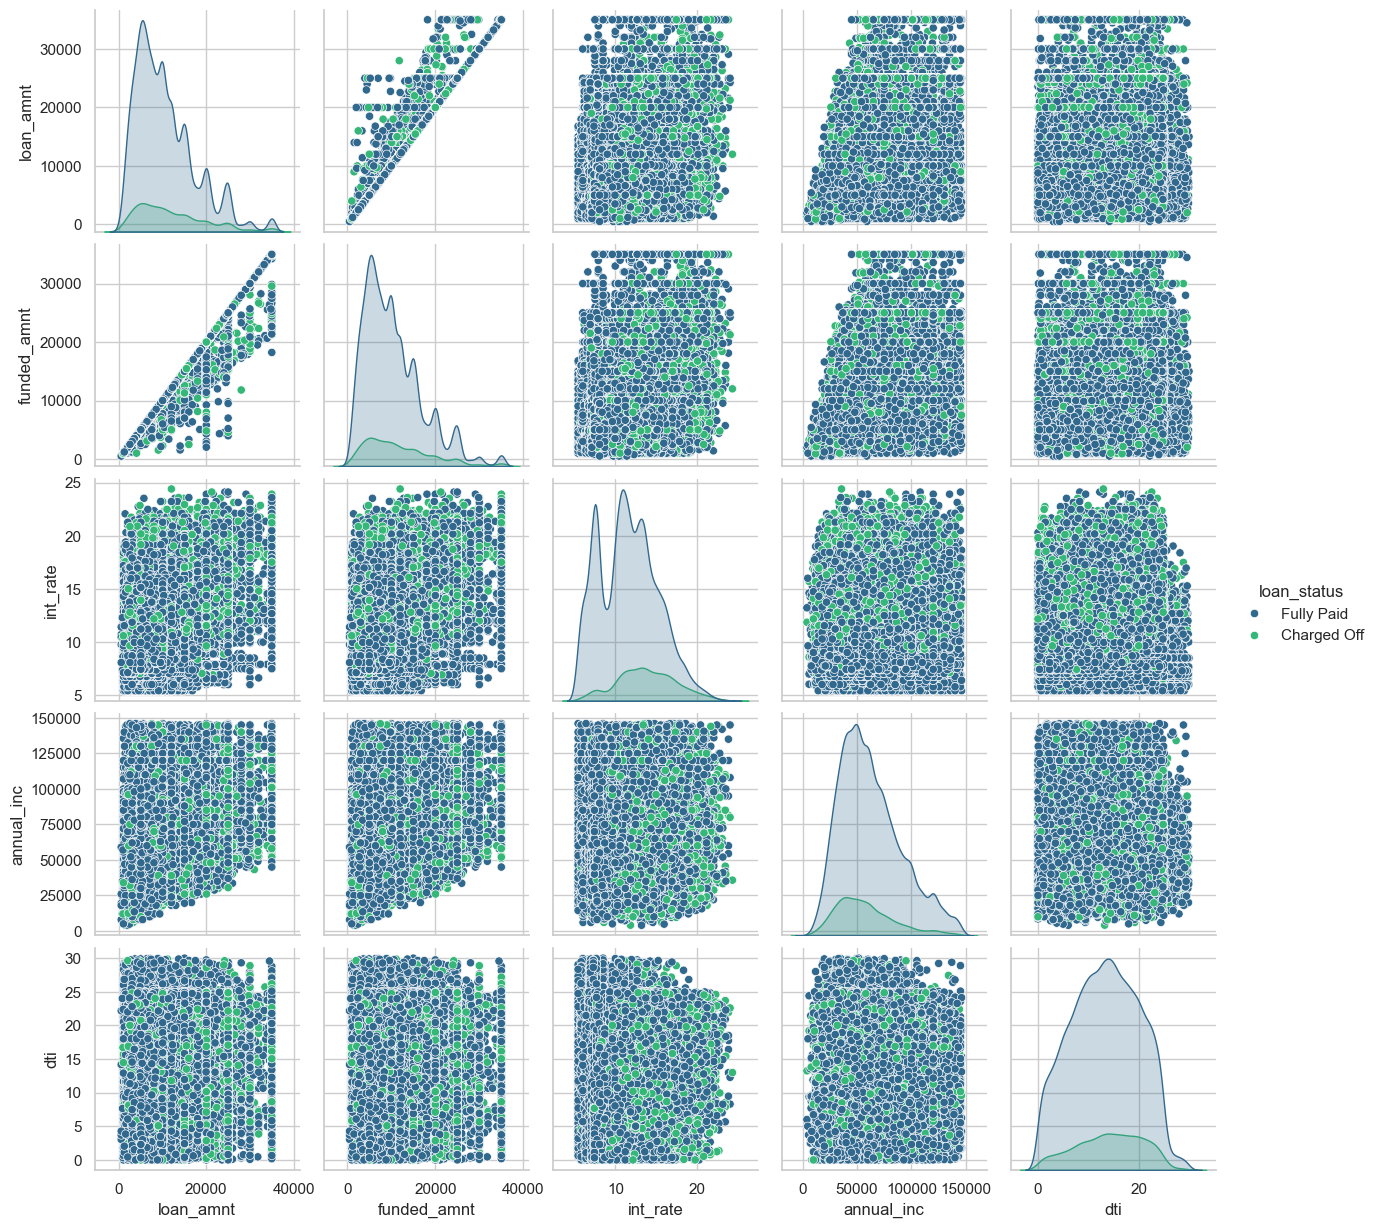

In [93]:
# Select a subset of columns to visualize in the pairplot for better clarity
selected_columns = ['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti', 'loan_status']

# Create a pairplot
sns.pairplot(loan_df[selected_columns], hue='loan_status', palette='viridis')

# Show the plot
plt.show()